# MSCS 634 Project Deliverable 4

## Objective
This deliverable consolidates all the work done during deliverable 1,2 and 3.  

The following regression models are implemented to predict an outcome variable using feature engineering and model evaluation techniques.

Regression Models Used:
 - Single Feature Regression
 - Multiple Feature Regression
 - Polynomial Regression (Degree 1 , 2 3)
 - Lasso Regression
 - Ridge Regression

This deliverable also includes classification and clustering models, applies association rule mining, and performs hyperparameter tuning to improve model performance.

classification models implemented: 
 - Decision Trees
 - k-NN
 - Naïve Bayes.

Clustering models implemented: 
  - K-Means
  -  Hierarchical.

Here is the URL for the dataset: https://www.kaggle.com/datasets/anassarfraz13/student-success-factors-and-insights

# Data Collection and Cleaning logic from Project Deliverable-1

This below logic:

 * Loads and cleans the dataset by handling missing values (mode/median), removing duplicates, and checking categorical data for inconsistencies.

 * Analyzes numerical columns to detect outliers using the IQR method and reports how many rows are affected.

 * Prepares the dataset for further analysis or modeling by ensuring data quality and identifying potential issues.

 * Even though outliers exist, we keep them because values like exam scores and hours studied are valid and useful for understanding differences between high and low performance.

# 1. Data Loading & Initial Inspection

For this intial setup we load the dataset using the pandas library and check its structure.

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [216]:
df = pd.read_csv('StudentPerformanceFactors.csv')
print(df.head())


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [217]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [218]:
#Gives information about the numerical data
df.describe()


Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

In [219]:
print(f"\nDataset shape: {df.shape}")
print(f"\nColumn names: {df.columns.tolist()}")



Dataset shape: (6607, 20)

Column names: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


## 2. Data Cleaning
In this step, we perform data cleaning to identify and address any issues such as duplicate entries or noisy data that may affect the quality of our analysis. We also check if there are any duplicates present.

### 2.1 Handling Missing Values


In [220]:
print("Missing values in each column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


Missing values in each column:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Total missing values: 235


In [221]:
# Check for missing values percentage
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Missing values percentage:")
print(missing_percent[missing_percent > 0])


Missing values percentage:
Teacher_Quality             1.180566
Parental_Education_Level    1.362192
Distance_from_Home          1.014076
dtype: float64


In [222]:
# Fixing the missing values
print("Before handling missing values:")
print(f"Shape: {df.shape}")

# Check which columns have missing values
cols_with_missing = df.columns[df.isnull().any()].tolist()
print(f"\nColumns with missing values: {cols_with_missing}")

# For categorical columns with missing values, filling with mode
# For numerical columns with missing values, filling with median
for col in cols_with_missing:
    if df[col].dtype in ['object']:
        mode_value = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled {col} with mode: {mode_value}")
    else:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Filled {col} with median: {median_value}")

print(f"\nAfter handling missing values:")
print(f"Shape: {df.shape}")
print(f"Remaining missing values: {df.isnull().sum().sum()}")


Before handling missing values:
Shape: (6607, 20)

Columns with missing values: ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
Filled Teacher_Quality with mode: Medium
Filled Parental_Education_Level with mode: High School
Filled Distance_from_Home with mode: Near

After handling missing values:
Shape: (6607, 20)
Remaining missing values: 0


### 2.2 Removing Duplicates


In [223]:
print("Before removing duplicates:")
print(f"Shape: {df.shape}")

duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    df = df.drop_duplicates()
    print("\nAfter removing duplicates:")
    print(f"Shape: {df.shape}")
    print(f"Rows removed: {duplicate_count}")
else:
    print("\nNo duplicates found in the dataset. Therefore not removing any date")


Before removing duplicates:
Shape: (6607, 20)

Number of duplicate rows: 0

No duplicates found in the dataset. Therefore not removing any date


### 2.3 Identifying and Addressing Noisy Data


In [224]:
# Display basic statistics to identify potential outliers
print("Statistical summary for numerical columns:")
print(df.describe())


Statistical summary for numerical columns:
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  

In [225]:
# Checking for inconsistent data in categorical columns
print("Unique values in categorical columns:\n")
categorical_cols = df.select_dtypes(include=['object']).columns

# Check for any inconsistencies in categorical data
inconsistencies_found = False
print("Checking for inconsistent categorical values...")
for col in categorical_cols:
    unique_vals = df[col].unique()
    # Check for leading/trailing spaces
    stripped_vals = [str(val).strip() if pd.notna(val) else val for val in unique_vals]
    original_vals = [str(val) if pd.notna(val) else val for val in unique_vals]
    
    if stripped_vals != original_vals:
        print(f"  WARNING: {col} has values with whitespace issues!")
        inconsistencies_found = True
    print(f"{col}: {unique_vals}\n")

if not inconsistencies_found:
    print("No inconsistencies found in categorical columns (no extra whitespace, all consistent)\n")


Unique values in categorical columns:

Checking for inconsistent categorical values...
Parental_Involvement: ['Low' 'Medium' 'High']

Access_to_Resources: ['High' 'Medium' 'Low']

Extracurricular_Activities: ['No' 'Yes']

Motivation_Level: ['Low' 'Medium' 'High']

Internet_Access: ['Yes' 'No']

Family_Income: ['Low' 'Medium' 'High']

Teacher_Quality: ['Medium' 'High' 'Low']

School_Type: ['Public' 'Private']

Peer_Influence: ['Positive' 'Negative' 'Neutral']

Learning_Disabilities: ['No' 'Yes']

Parental_Education_Level: ['High School' 'College' 'Postgraduate']

Distance_from_Home: ['Near' 'Moderate' 'Far']

Gender: ['Male' 'Female']

No inconsistencies found in categorical columns (no extra whitespace, all consistent)



In [226]:
# Check for outliers using IQR method for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Outlier detection using IQR method:\n")

# Create mask with DataFrame index to ensure alignment
outlier_mask = pd.Series(False, index=df.index)

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}:")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"  Outlier range: [{outliers[col].min():.2f}, {outliers[col].max():.2f}]")
        # Add to outlier mask
        outlier_mask |= (df[col] < lower_bound) | (df[col] > upper_bound)
    print()

# Summary of outliers found
total_outliers = outlier_mask.sum()
print(f"Total rows with at least one outlier: {total_outliers}")
print(f"Percentage of data with outliers: {total_outliers/len(df)*100:.2f}%")

# Note: Outlier removal will be handled in the next cell (2.4) 
# to properly exclude Exam_Score from outlier removal


Outlier detection using IQR method:

Hours_Studied:
  Lower bound: 4.00, Upper bound: 36.00
  Number of outliers: 43 (0.65%)
  Outlier range: [1.00, 44.00]

Attendance:
  Lower bound: 40.00, Upper bound: 120.00
  Number of outliers: 0 (0.00%)

Sleep_Hours:
  Lower bound: 3.00, Upper bound: 11.00
  Number of outliers: 0 (0.00%)

Previous_Scores:
  Lower bound: 25.50, Upper bound: 125.50
  Number of outliers: 0 (0.00%)

Tutoring_Sessions:
  Lower bound: -0.50, Upper bound: 3.50
  Number of outliers: 430 (6.51%)
  Outlier range: [4.00, 8.00]

Physical_Activity:
  Lower bound: -1.00, Upper bound: 7.00
  Number of outliers: 0 (0.00%)

Exam_Score:
  Lower bound: 59.00, Upper bound: 75.00
  Number of outliers: 104 (1.57%)
  Outlier range: [55.00, 101.00]

Total rows with at least one outlier: 553
Percentage of data with outliers: 8.37%


### 2.4 Removing Outliers from Features


In [227]:
#We might have to rethink whether to remove the outliers or not based the analysis we need to perform for future deliverables.
#For now we will create another df_cleaned with the outliers removed
df_cleaned = df[~outlier_mask].reset_index(drop=True)

print(f"\nAfter outlier removal:")
print(f"  Rows before: {len(df)}")
print(f"  Rows after: {len(df_cleaned)}")
print(f"  Removed: {total_outliers} rows ({total_outliers/len(df)*100:.2f}%)")



After outlier removal:
  Rows before: 6607
  Rows after: 6054
  Removed: 553 rows (8.37%)


## 3. Exploratory Data Analysis (EDA)


### 3.1 Distribution of Exam Score (Target Variable)


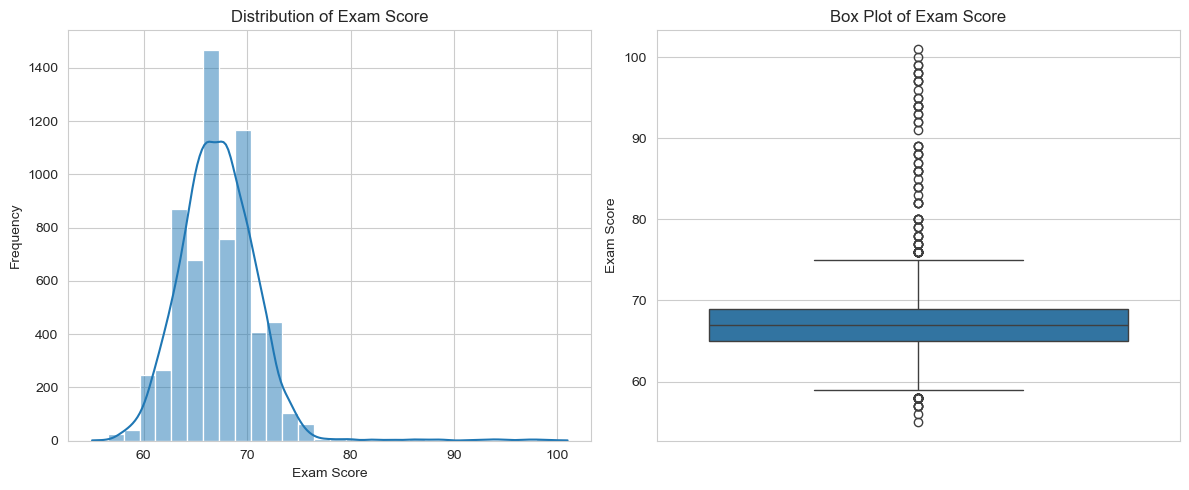

Exam Score Statistics:
count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64


In [228]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Exam_Score'], kde=True, bins=30)
plt.title('Distribution of Exam Score')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Exam_Score'])
plt.title('Box Plot of Exam Score')
plt.ylabel('Exam Score')

plt.tight_layout()
plt.show()

print(f"Exam Score Statistics:")
print(df['Exam_Score'].describe())


# Figure Analysis
This figure provides a comprehensive view of the Exam Score distribution in the dataset. The histogram with KDE (on the left) shows how exam scores are spread across students, helping to identify patterns such as skewness, peaks, or the presence of multiple modes. The box plot (on the right) summarizes the distribution by highlighting the median, quartiles, and potential outliers, making it easier to spot any extreme values or uneven score distribution. Together with the summary statistics, these visuals help in understanding the central tendency, variability, and overall shape of the exam score data.

### 3.2 Distribution of Numerical Features


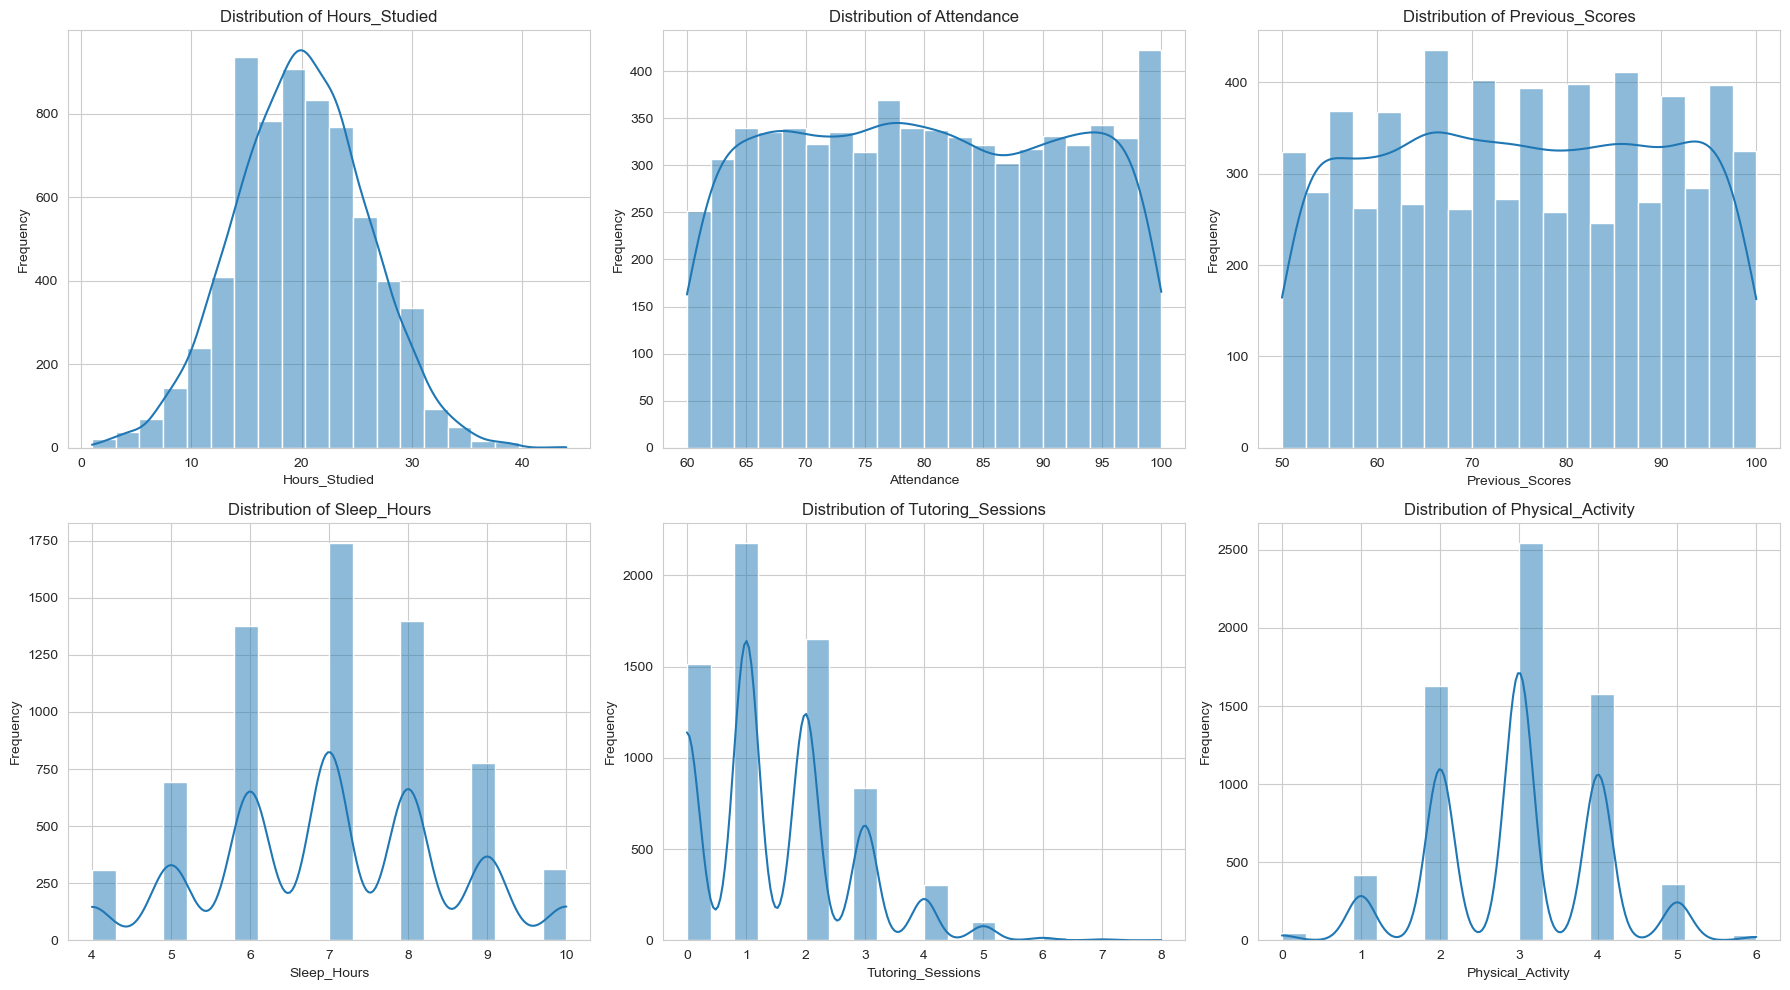

In [229]:
# Plot distributions of key numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

key_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Sleep_Hours', 
                'Tutoring_Sessions', 'Physical_Activity']

for idx, feature in enumerate(key_features):
    if idx < len(axes):
        sns.histplot(df[feature], kde=True, ax=axes[idx], bins=20)
        axes[idx].set_title(f'Distribution of {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Figure Analysis
This figure above helps to visualizes the distribution of key numerical features in the dataset, including Hours Studied, Attendance, Previous Scores, Sleep Hours, Tutoring Sessions, and Physical Activity. Each histogram, overlaid with a KDE curve, helps identify the shape, spread, and central tendency of each variable. The plots make it easier to detect patterns such as skewness, variability, or clustering, and to compare how these features differ in their distributions, providing valuable insights for understanding student behavior and performance trends.

### 3.3 Categorical Feature Analysis


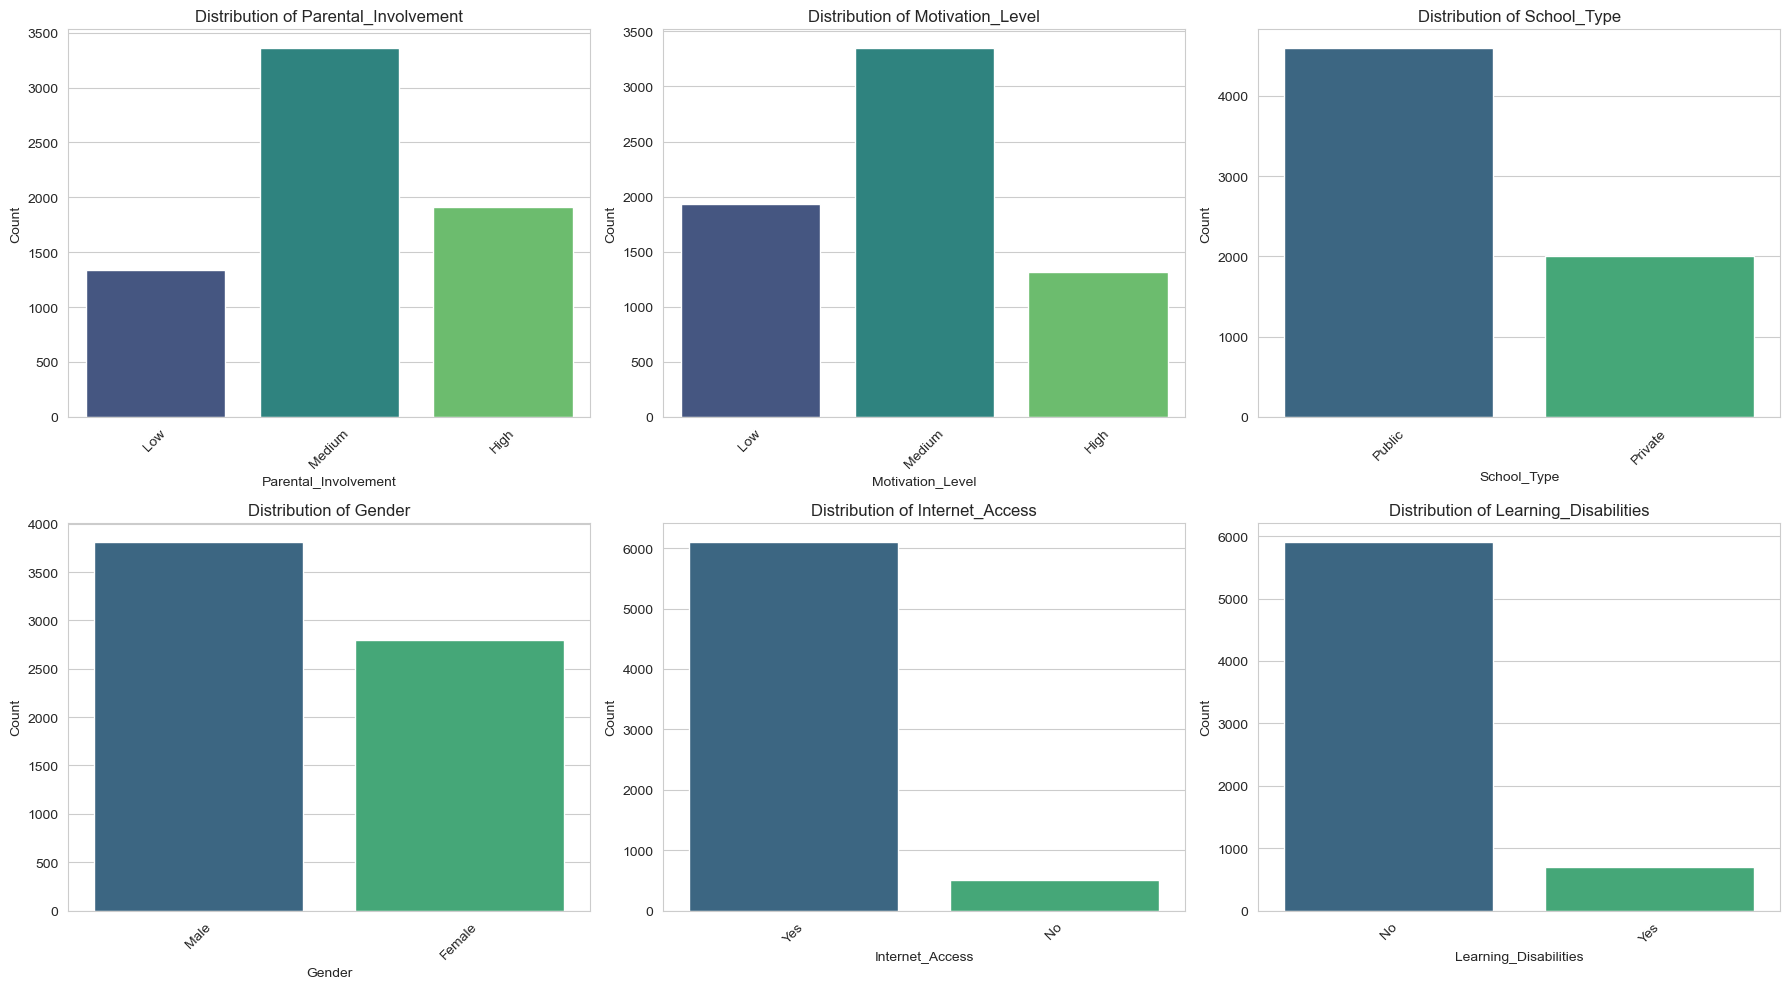

In [230]:
# Analyze categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

categorical_features = ['Parental_Involvement', 'Motivation_Level', 'School_Type', 
                        'Gender', 'Internet_Access', 'Learning_Disabilities']

for idx, feature in enumerate(categorical_features):
    if idx < len(axes):
        sns.countplot(data=df, x=feature, ax=axes[idx], palette='viridis')
        axes[idx].set_title(f'Distribution of {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()


# Figure Analysis
This figure above helps visualize the distribution of categorical features in the dataset, such as Parental Involvement, Motivation Level, School Type, Gender, Internet Access, and Learning Disabilities. Each count plot shows how many students fall into each category, making it easier to identify dominant groups, class imbalances, or underrepresented categories. This analysis is useful for understanding the overall composition of the dataset, guiding data preprocessing steps like encoding and helping identify potential biases or areas needing normalization before modeling.

### 3.4 Correlation Analysis


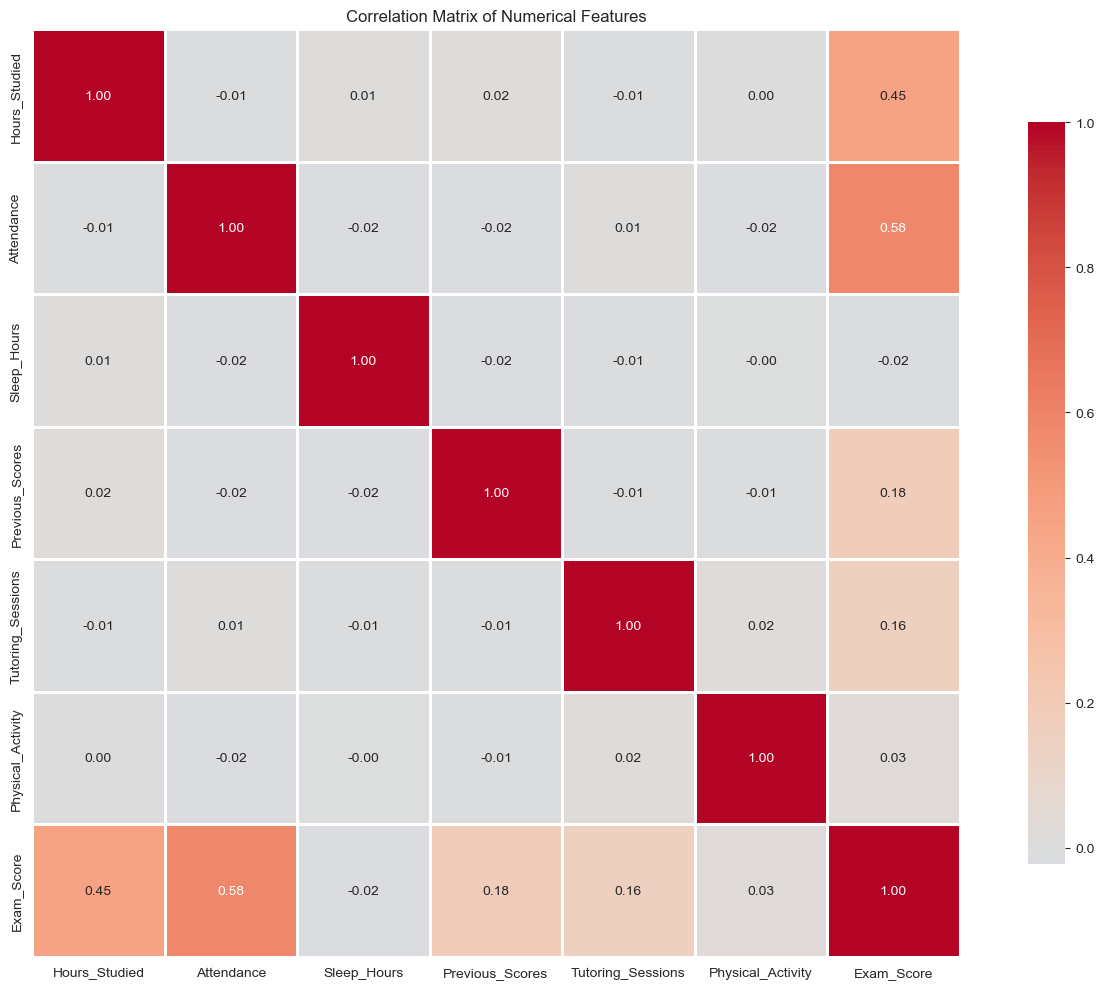

In [231]:
# Correlation matrix for numerical features
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


In [232]:
# Top correlations with Exam Score
correlations_with_target = df[numerical_cols].corr()['Exam_Score'].sort_values(ascending=False)
print("Correlation with Exam Score:")
print(correlations_with_target)


Correlation with Exam Score:
Exam_Score           1.000000
Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64


# Figure Analysis
This figure displays the correlation matrix of all numerical features, illustrating how strongly each pair of variables is related. The heatmap visually highlights both positive and negative correlations, with darker colors indicating stronger relationships. From the correlation values, Exam Score shows the highest positive correlations with Attendance (0.59) and Hours Studied (0.44), suggesting that consistent attendance and study time have a significant impact on performance. Other factors like Previous Scores and Tutoring Sessions show weaker positive relationships, while Sleep Hours and Physical Activity have little to no correlation, indicating minimal direct influence on exam outcomes.

### 3.5 Relationship Between Key Features and Exam Score


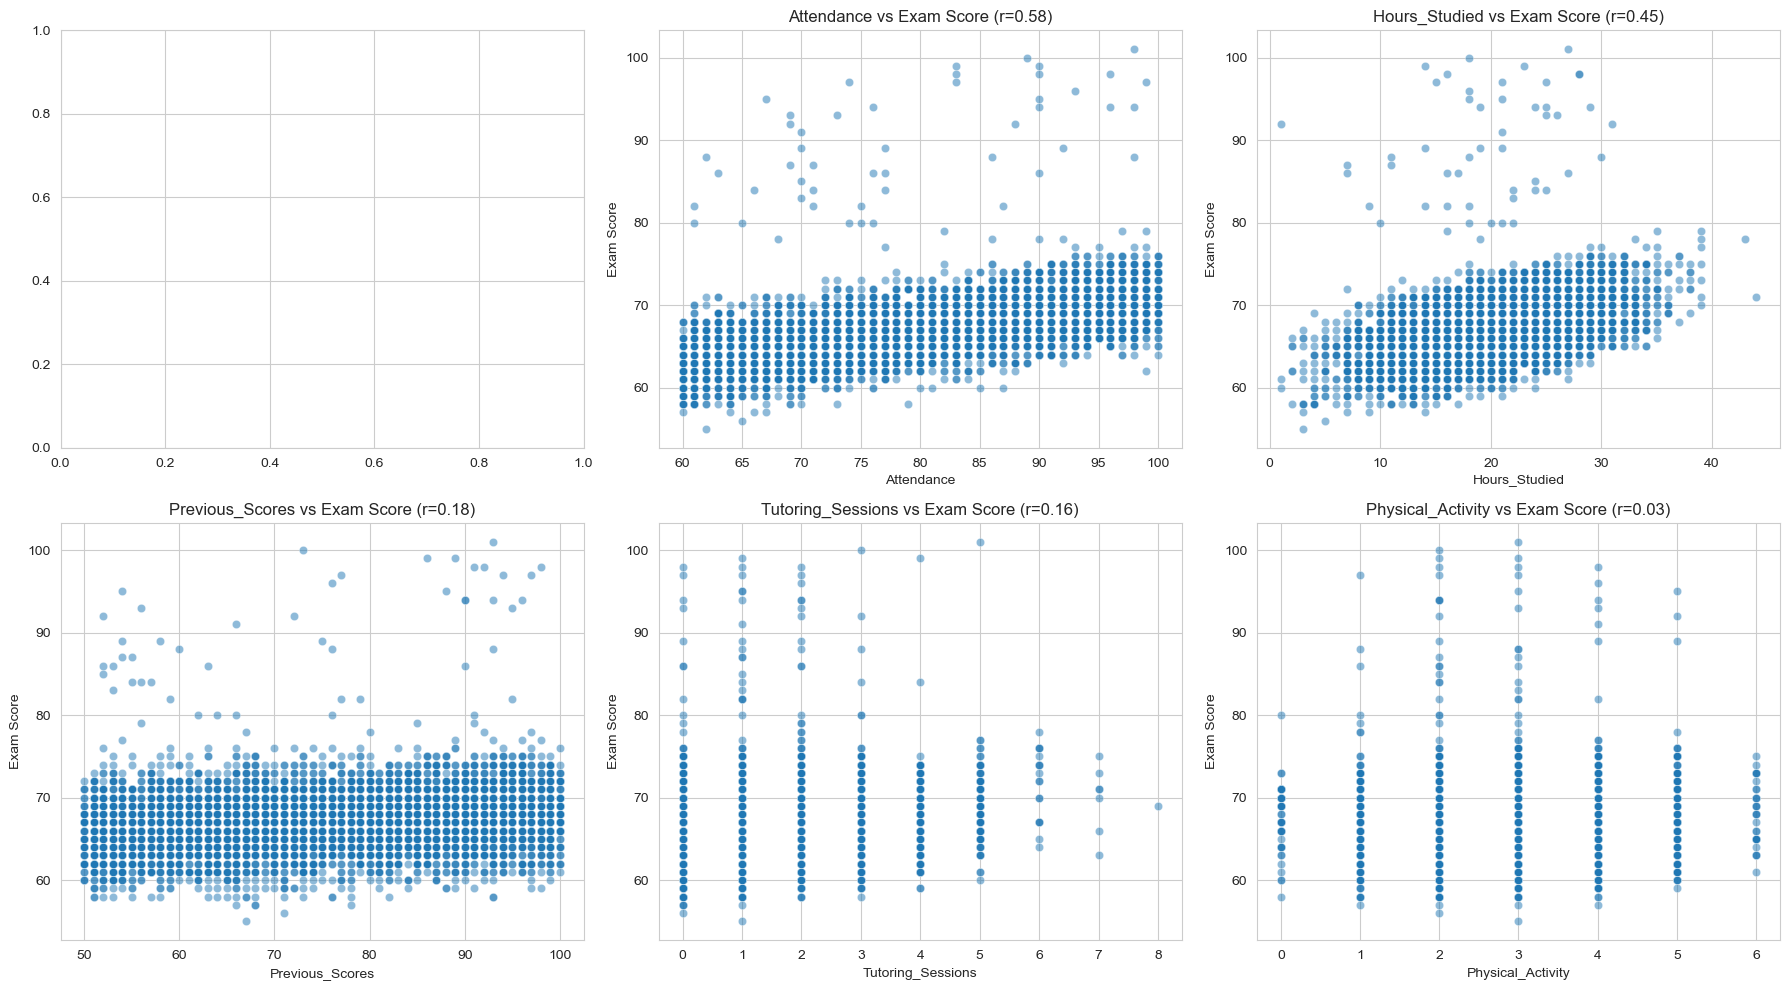

In [233]:
# Scatter plots for top correlated features with Exam Score
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

top_correlations = correlations_with_target.abs().sort_values(ascending=False).head(6)

for idx, (feature, corr_value) in enumerate(top_correlations.items()):
    if feature != 'Exam_Score' and idx < len(axes):
        sns.scatterplot(data=df, x=feature, y='Exam_Score', ax=axes[idx], alpha=0.5)
        axes[idx].set_title(f'{feature} vs Exam Score (r={corr_value:.2f})')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Exam Score')

plt.tight_layout()
plt.show()


### 3.6 Categorical Features Impact on Exam Score


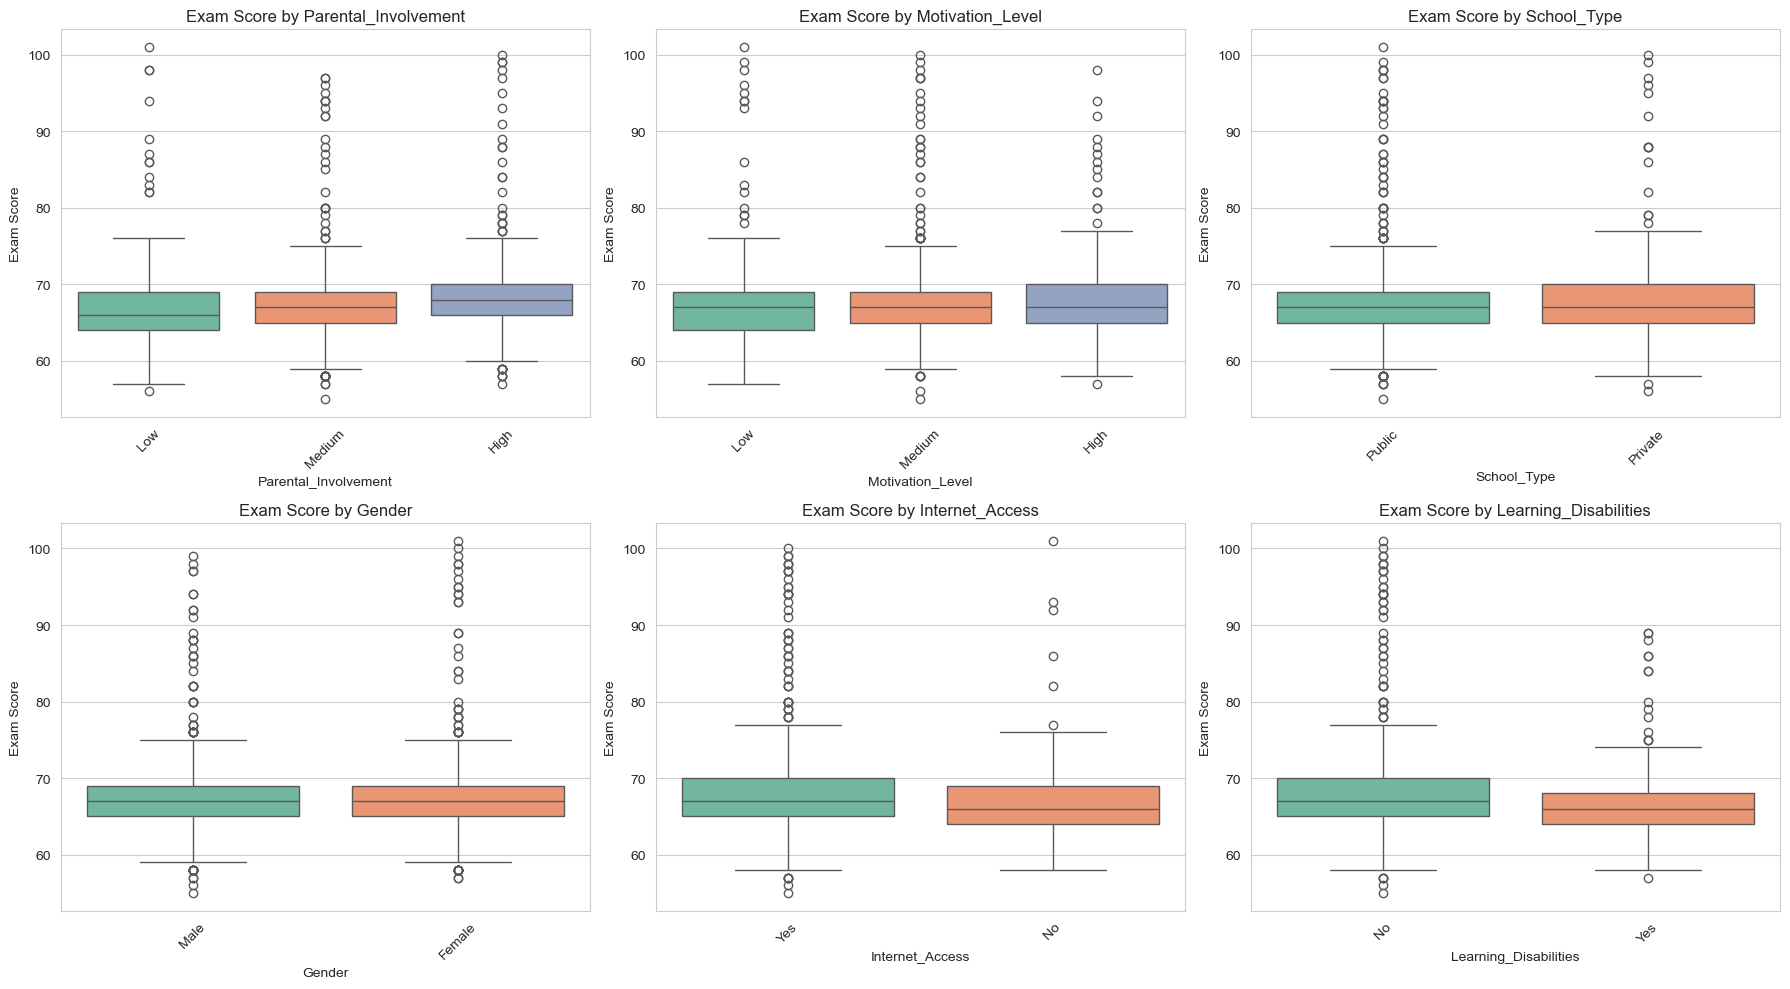

In [234]:
# Box plots showing how categorical features affect Exam Score
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    if idx < len(axes):
        sns.boxplot(data=df, x=feature, y='Exam_Score', ax=axes[idx], palette='Set2')
        axes[idx].set_title(f'Exam Score by {feature}')
        axes[idx].set_xlabel(feature)
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].set_ylabel('Exam Score')

plt.tight_layout()
plt.show()


### 3.7 Outlier Visualization


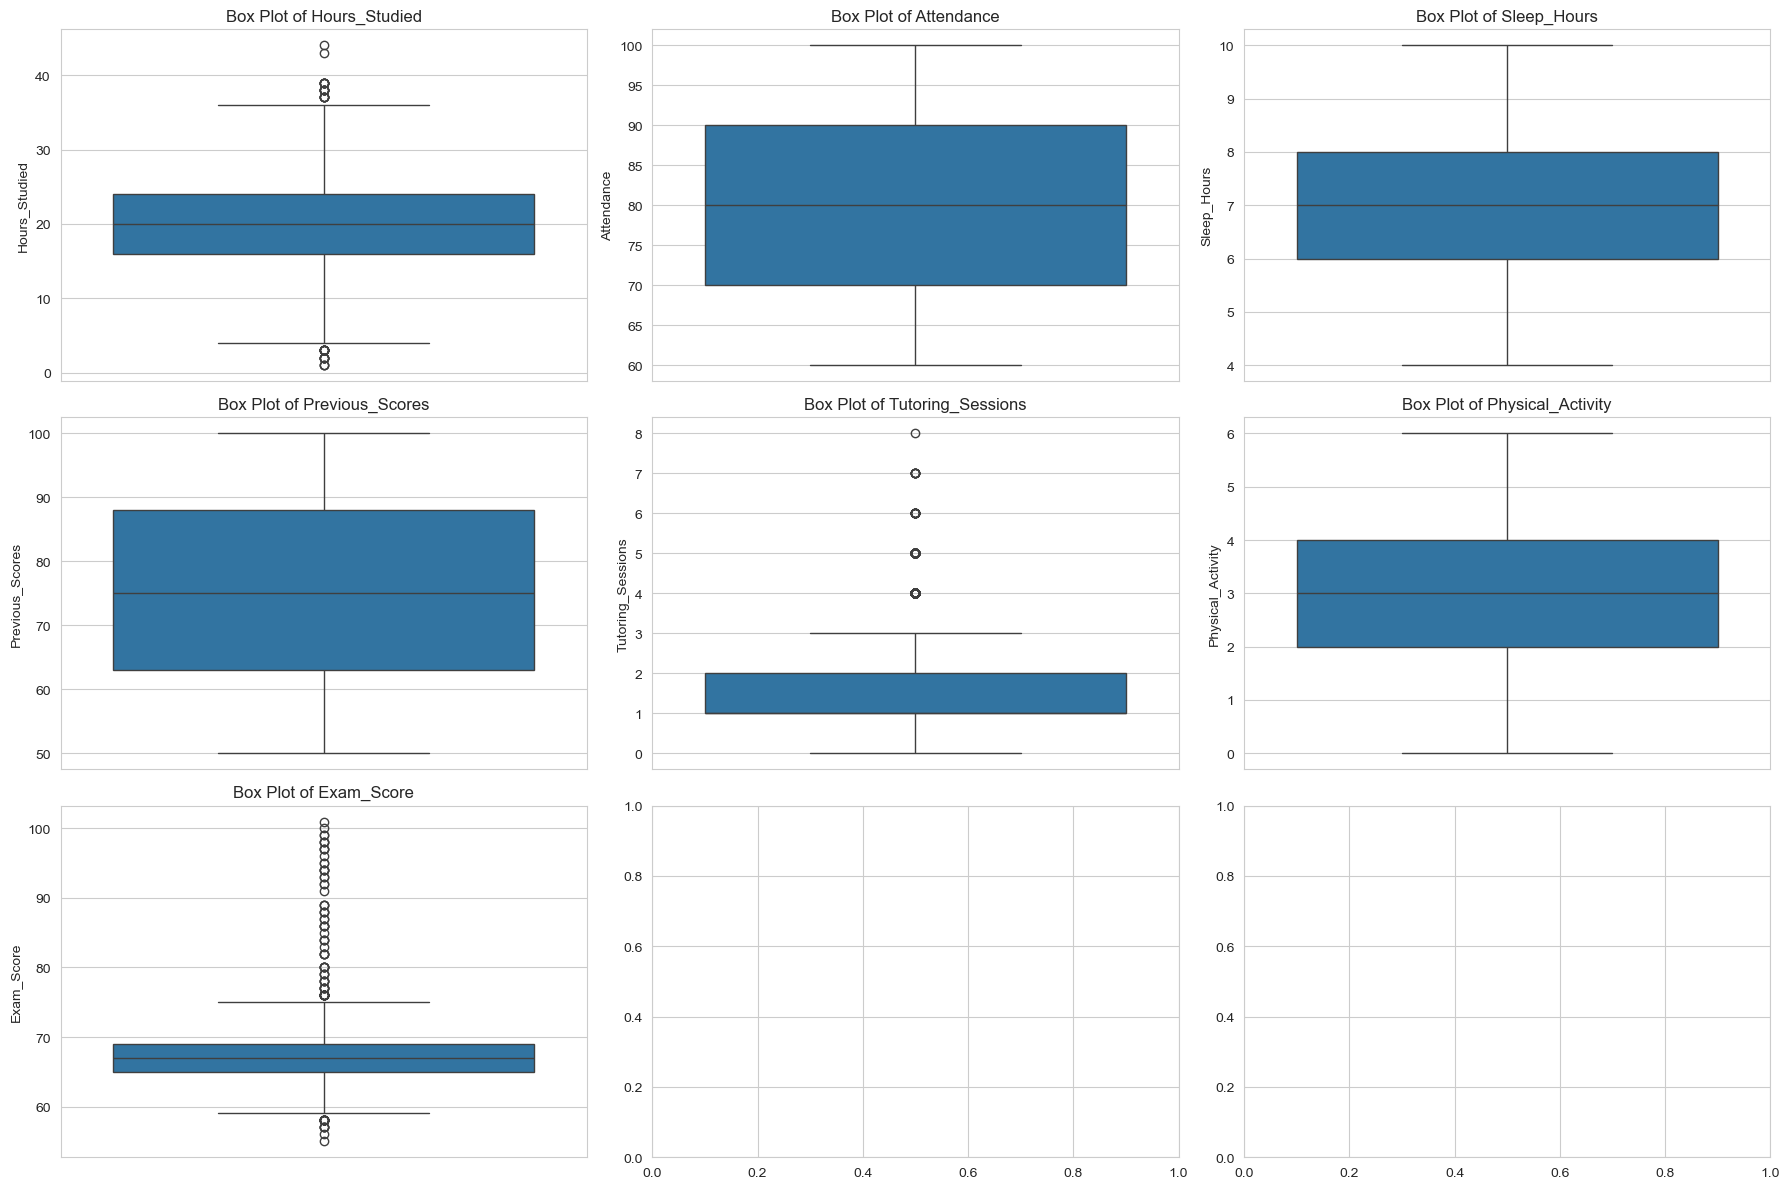

In [235]:
# Box plots for all numerical features to visualize outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        sns.boxplot(data=df, y=col, ax=axes[idx])
        axes[idx].set_title(f'Box Plot of {col}')
        axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()


### 3.8 Pairwise Relationships of Key Features


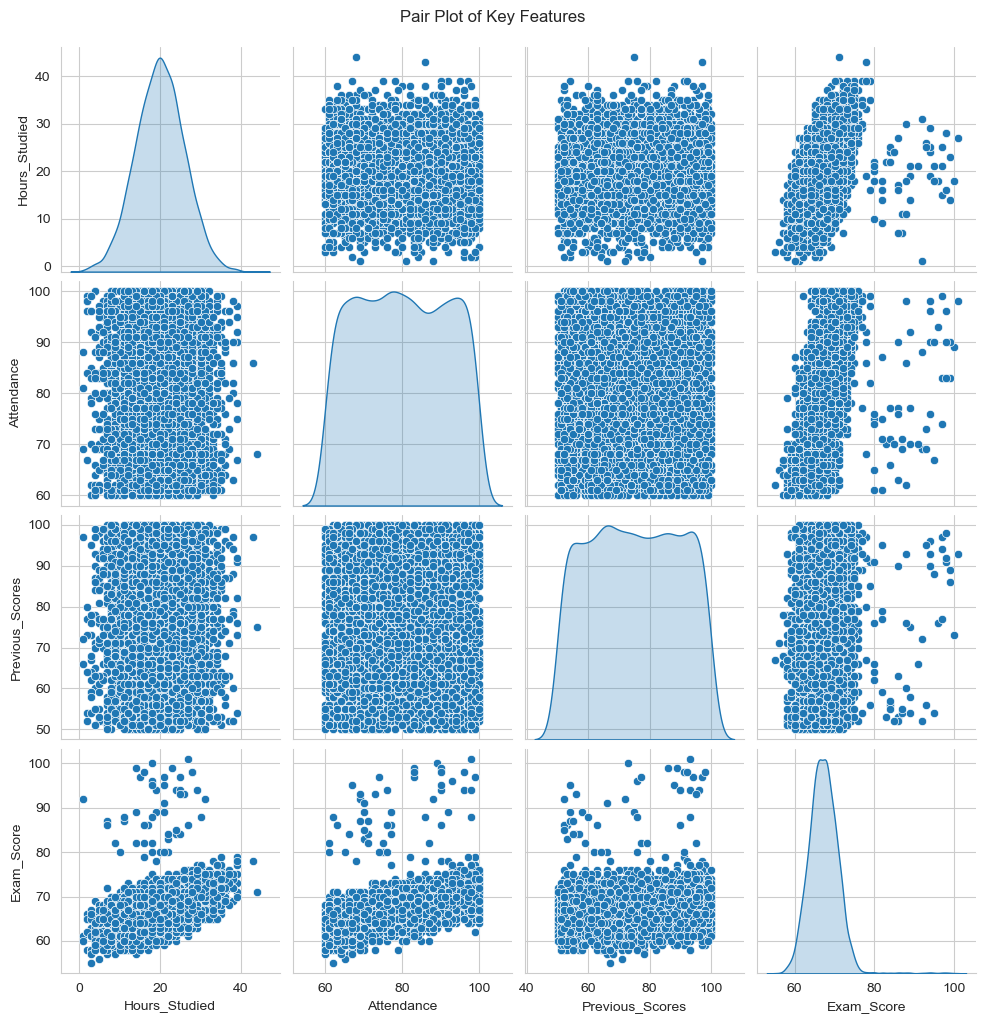

In [236]:
# Pair plot for top features
top_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']
sns.pairplot(df[top_features], diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()


### 3.9 Additional Insights: Combined Effects


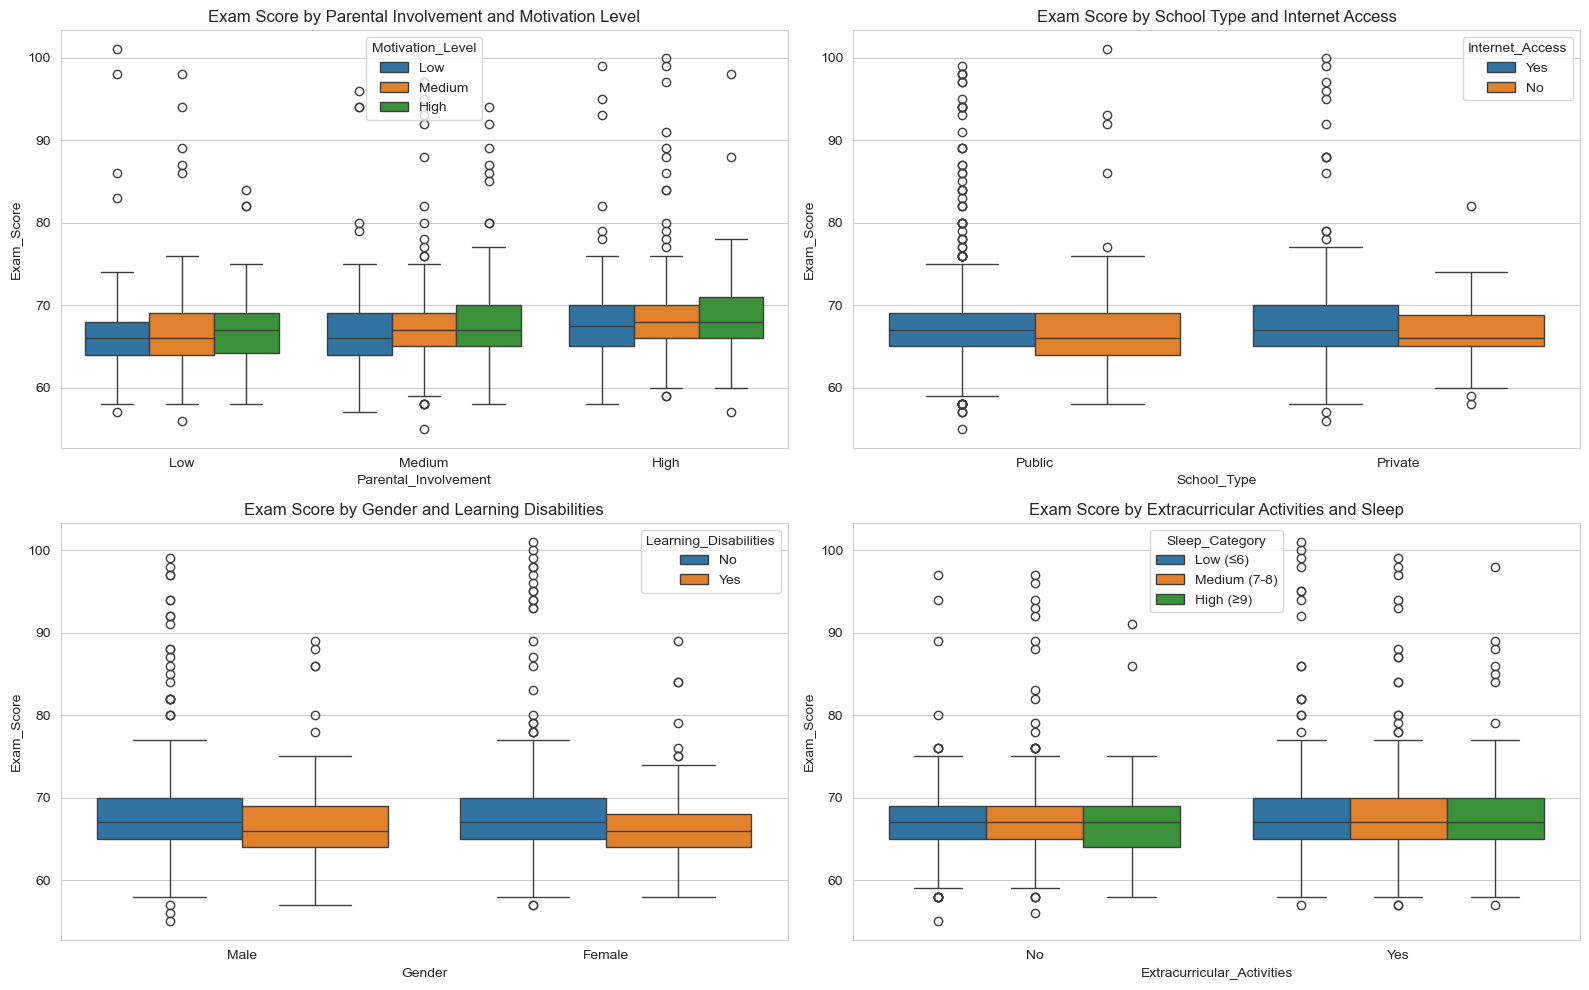

In [237]:
# Analyzing interaction between multiple categorical features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Parental Involvement vs Motivation Level
sns.boxplot(data=df, x='Parental_Involvement', y='Exam_Score', hue='Motivation_Level', ax=axes[0, 0])
axes[0, 0].set_title('Exam Score by Parental Involvement and Motivation Level')

# School Type vs Internet Access
sns.boxplot(data=df, x='School_Type', y='Exam_Score', hue='Internet_Access', ax=axes[0, 1])
axes[0, 1].set_title('Exam Score by School Type and Internet Access')

# Gender vs Learning Disabilities
sns.boxplot(data=df, x='Gender', y='Exam_Score', hue='Learning_Disabilities', ax=axes[1, 0])
axes[1, 0].set_title('Exam Score by Gender and Learning Disabilities')

# Extracurricular Activities vs Sleep Hours (bin sleep hours)
df['Sleep_Category'] = pd.cut(df['Sleep_Hours'], bins=[0, 6, 8, 12], labels=['Low (≤6)', 'Medium (7-8)', 'High (≥9)'])
sns.boxplot(data=df, x='Extracurricular_Activities', y='Exam_Score', hue='Sleep_Category', ax=axes[1, 1])
axes[1, 1].set_title('Exam Score by Extracurricular Activities and Sleep')

plt.tight_layout()
plt.show()


## 4. Key Insights from EDA


### 4.1 Summary Statistics


In [238]:
# Final summary of the cleaned dataset
print("FINAL DATASET SUMMARY")
print("-"*60)

print(f"\nDataset Shape: {df.shape}")
print(f"Number of records: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]}")

print(f"\nNumerical Features: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"Categorical Features: {len(df.select_dtypes(include=['object']).columns)}")

print(f"\nTarget Variable: Exam_Score")
print(f"  Mean: {df['Exam_Score'].mean():.2f}")
print(f"  Median: {df['Exam_Score'].median():.2f}")
print(f"  Std: {df['Exam_Score'].std():.2f}")
print(f"  Min: {df['Exam_Score'].min()}")
print(f"  Max: {df['Exam_Score'].max()}")

print("\nMissing Values:")
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
if len(missing_summary) == 0:
    print("  No missing values!")
else:
    print(missing_summary)


FINAL DATASET SUMMARY
------------------------------------------------------------

Dataset Shape: (6607, 21)
Number of records: 6,607
Number of features: 21

Numerical Features: 7
Categorical Features: 13

Target Variable: Exam_Score
  Mean: 67.24
  Median: 67.00
  Std: 3.89
  Min: 55
  Max: 101

Missing Values:
  No missing values!


### 4.2 Key Findings and Insights


In [239]:
print("KEY INSIGHTS:")
print("-"*60)

# 1. Most important features based on correlation
print("\n1. TOP PREDICTORS OF EXAM SCORE (by correlation):")
top_predictors = correlations_with_target.abs().sort_values(ascending=False).head(5)
for idx, (feature, corr) in enumerate(top_predictors.items(), 1):
    if feature != 'Exam_Score':
        print(f"   {idx}. {feature}: {corr:.3f}")

# 2. Categorical insights
print("\n2. IMPACT OF CATEGORICAL FEATURES ON EXAM SCORE:")
print("   Parental Involvement:")
for level in df['Parental_Involvement'].unique():
    score = df[df['Parental_Involvement'] == level]['Exam_Score'].mean()
    print(f"     - {level}: {score:.2f}")

print("   Motivation Level:")
for level in df['Motivation_Level'].unique():
    score = df[df['Motivation_Level'] == level]['Exam_Score'].mean()
    print(f"     - {level}: {score:.2f}")

print("   Learning Disabilities:")
for level in df['Learning_Disabilities'].unique():
    score = df[df['Learning_Disabilities'] == level]['Exam_Score'].mean()
    print(f"     - {level}: {score:.2f}")

# 3. Outlier summary
print("\n3. OUTLIER SUMMARY:")
outlier_counts = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

sorted_outliers = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)
print("   Features with most outliers:")
for col, count in sorted_outliers[:5]:
    print(f"     - {col}: {count} outliers ({count/len(df)*100:.1f}%)")

KEY INSIGHTS:
------------------------------------------------------------

1. TOP PREDICTORS OF EXAM SCORE (by correlation):
   2. Attendance: 0.581
   3. Hours_Studied: 0.445
   4. Previous_Scores: 0.175
   5. Tutoring_Sessions: 0.157

2. IMPACT OF CATEGORICAL FEATURES ON EXAM SCORE:
   Parental Involvement:
     - Low: 66.36
     - Medium: 67.10
     - High: 68.09
   Motivation Level:
     - Low: 66.75
     - Medium: 67.33
     - High: 67.70
   Learning Disabilities:
     - No: 67.35
     - Yes: 66.27

3. OUTLIER SUMMARY:
   Features with most outliers:
     - Tutoring_Sessions: 430 outliers (6.5%)
     - Exam_Score: 104 outliers (1.6%)
     - Hours_Studied: 43 outliers (0.7%)
     - Attendance: 0 outliers (0.0%)
     - Sleep_Hours: 0 outliers (0.0%)


# Conclusion
In conclusion, the exploratory data analysis (EDA) of the student performance dataset provided meaningful insights into the factors influencing academic outcomes. The dataset was found to be well-structured with minimal missing or inconsistent data, ensuring reliable analysis. Key predictors such as Previous Scores, Hours Studied, and Attendance showed strong correlations with Exam Score, highlighting their significance in predicting performance. Additionally, the interactions between categorical and numerical features revealed complex dependencies that could further enhance model accuracy. Overall, these insights serve as a solid foundation for developing robust predictive models aimed at forecasting student exam performance with high precision for the future project deliverables.

# Deliverable 2 Performing Feature Engineering

We'll perform feature engineering to create or improve features that enhance model performance. This includes:
1. Encoding categorical variables (ordinal encoding, one-hot encoding)
2. Creating interaction features based on domain knowledge
3. Feature scaling/normalization for regularized models
4. Train-test split for model evaluation

In [240]:
df_features = df.copy()
print("FEATURE ENGINEERING")
print("-"*80)

# Separate target variable
target = 'Exam_Score'
y = df_features[target].copy()
# Drop target and any visualization-only columns (like Sleep_Category)
columns_to_drop = [target]
if 'Sleep_Category' in df_features.columns:
    columns_to_drop.append('Sleep_Category')
X = df_features.drop(columns=columns_to_drop).copy()

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

# 1. ORDINAL ENCODING for ordinal categorical variables
# These have inherent ordering
ordinal_mappings = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Peer_Influence': ['Negative', 'Neutral', 'Positive'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Far', 'Moderate', 'Near']
}

X_encoded = X.copy()

print("\n1. Ordinal Encoding")
print("-"*80)

for col, order in ordinal_mappings.items():
    if col in X_encoded.columns:
        le = OrdinalEncoder(categories=[order])
        X_encoded[col] = le.fit_transform(X_encoded[[col]])
        print(f"{col}: {order} -> [0, 1, 2]")

# 2. ONE-HOT ENCODING for nominal categorical variables
# These don't have inherent ordering
nominal_cols = [col for col in categorical_cols if col not in ordinal_mappings.keys()]

print("\n2. One-hot Encoding")
print("-"*80)

if nominal_cols:
    print(f"Nominal columns to encode: {nominal_cols}")
    X_encoded = pd.get_dummies(X_encoded, columns=nominal_cols, drop_first=True)
    print(f"After one-hot encoding: {X_encoded.shape[1]} features")
else:
    print("No nominal columns to encode")

# 3. Creating interaction features
print("\n3. Creating interaction features")
print("-"*80)

X_final = X_encoded.copy()

# High-value interaction features based on domain knowledge
# Study effectiveness = Hours * Attendance * Motivation
X_final['Study_Effectiveness'] = X['Hours_Studied'] * X['Attendance'] / 100 * X_encoded['Motivation_Level']

# Preparation score = Previous Scores + Tutoring sessions
X_final['Preparation_Score'] = X['Previous_Scores'] + X['Tutoring_Sessions'] * 5

# Health and well-being = Sleep * Physical Activity
X_final['Health_Wellness'] = X['Sleep_Hours'] * X['Physical_Activity']

# Resource advantage = Access to Resources * Family Income
if 'Access_to_Resources' in X_encoded.columns:
    X_final['Resource_Advantage'] = X_encoded['Access_to_Resources'] * X_encoded['Family_Income']

# Parental support = Parental Involvement * Parental Education
if 'Parental_Involvement' in X_encoded.columns:
    X_final['Parental_Support'] = X_encoded['Parental_Involvement'] * X_encoded['Parental_Education_Level']

print("Created interaction features:")
print("  - Study_Effectiveness: Hours_Studied * Attendance * Motivation_Level")
print("  - Preparation_Score: Previous_Scores + Tutoring_Sessions * 5")
print("  - Health_Wellness: Sleep_Hours * Physical_Activity")
if 'Access_to_Resources' in X_encoded.columns:
    print("  - Resource_Advantage: Access_to_Resources * Family_Income")
if 'Parental_Involvement' in X_encoded.columns:
    print("  - Parental_Support: Parental_Involvement * Parental_Education_Level")

print(f"\nTotal features after engineering: {X_final.shape[1]}")

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

print("\nDATA SPLITTING")
print("-"*80)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_final)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_final)*100:.1f}%)")

# Feature scaling for models that benefit from it (Ridge, Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

FEATURE ENGINEERING
--------------------------------------------------------------------------------

Categorical columns (13): ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numerical columns (6): ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']

1. Ordinal Encoding
--------------------------------------------------------------------------------
Parental_Involvement: ['Low', 'Medium', 'High'] -> [0, 1, 2]
Access_to_Resources: ['Low', 'Medium', 'High'] -> [0, 1, 2]
Motivation_Level: ['Low', 'Medium', 'High'] -> [0, 1, 2]
Family_Income: ['Low', 'Medium', 'High'] -> [0, 1, 2]
Teacher_Quality: ['Low', 'Medium', 'High'] -> [0, 1, 2]
Peer_Influence: ['Negative', 'Neutral', 'Positive'] -> [0, 1, 2]
Parental_Educat

## Building Regression Models

* We will build and compare several regression models, including Simple Linear Regression (baseline with one feature), Multiple Linear Regression (using all features), Ridge Regression (L2 regularization to reduce overfitting), Lasso Regression (L1 regularization for feature selection), and Polynomial Regression (degrees 1, 2, and 3 to capture non-linear relationships).

* Each model will be evaluated using R-squared (explained variance), Mean Squared Error (average squared error), Root Mean Squared Error (error spread), Mean Absolute Error (average absolute error), and 5-fold cross-validation to assess generalization to unseen data.


* Reusing below method to train and evaluate various regression models. It includes a function to fit a model, make predictions on training and test sets, calculate key performance metrics (R², MSE, RMSE, MAE), and optionally perform cross-validation to assess generalization. Another function formats and prints these results, including an overfitting indicator based on the difference between training and test R² scores, helping identify whether the model is overfitting or generalizing well.

In [241]:
# Dictionary to store models and results
models = {}
results = {}

# Setup cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, cv=None):
    """Helper function to train and evaluate a model"""
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Cross-validation
    cv_scores = None
    cv_mean = None
    cv_std = None
    
    if cv is not None:
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, 
                                     scoring='r2', n_jobs=-1)
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    
    # Storing results here
    results[model_name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_scores': cv_scores,
        'cv_mean': cv_mean,
        'cv_std': cv_std
    }
    
    return results[model_name]

def print_model_results(model_name, res):
    """Helper function to print model results"""
    print(f"{model_name.upper()}")
    print(f"{'-'*80}")
    print(f"\nTraining Set Metrics:")
    print(f"  R² Score:     {res['train_r2']:.4f}")
    print(f"  MSE:          {res['train_mse']:.4f}")
    print(f"  RMSE:         {res['train_rmse']:.4f}")
    print(f"  MAE:          {res['train_mae']:.4f}")
    
    print(f"\nTest Set Metrics:")
    print(f"  R² Score:     {res['test_r2']:.4f}")
    print(f"  MSE:          {res['test_mse']:.4f}")
    print(f"  RMSE:         {res['test_rmse']:.4f}")
    print(f"  MAE:          {res['test_mae']:.4f}")
    
    if res['cv_mean'] is not None:
        print(f"\nCross-Validation (5-fold):")
        print(f"  Mean R²:     {res['cv_mean']:.4f} (±{res['cv_std']:.4f})")
        print(f"  CV Scores:   {res['cv_scores']}")
    
    # Calculate overfitting indicator
    overfitting = res['train_r2'] - res['test_r2']
    print(f"\nOverfitting Indicator (Train R² - Test R²): {overfitting:.4f}")
    if overfitting > 0.1:
        print("Potential overfitting detected")
    elif overfitting < 0:
        print("Model generalizes well")
    else:
        print("Model shows balanced performance")


## Simple Linear Regression 
The below block builds and evaluates a simple linear regression model using only Attendance to predict Exam_Score, demonstrating the relationship between a single high-correlation feature and the target.

In [242]:
# MODEL 1: Simple Linear Regression (using only one feature)
# Using Attendance as it has highest correlation with Exam_Score than Previous_Scores
print("Using single feature: Attendance (has highest correlation with Exam_Score)")

# Simple linear regression with just one feature - Attendance
X_simple_train = X_train[['Attendance']]
X_simple_test = X_test[['Attendance']]

lr_simple = LinearRegression()
results['Simple_Linear'] = evaluate_model(
    lr_simple, X_simple_train, X_simple_test, y_train, y_test, 
    'Simple_Linear', cv=kfold
)
print_model_results('Simple Linear Regression', results['Simple_Linear'])

# Show coefficient
print(f"\nCoefficient: {lr_simple.coef_[0]:.4f}")
print(f"Intercept: {lr_simple.intercept_:.4f}")
print(f"Equation: Exam_Score = {lr_simple.intercept_:.4f} + {lr_simple.coef_[0]:.4f} * Attendance")


Using single feature: Attendance (has highest correlation with Exam_Score)
SIMPLE LINEAR REGRESSION
--------------------------------------------------------------------------------

Training Set Metrics:
  R² Score:     0.3352
  MSE:          10.2246
  RMSE:         3.1976
  MAE:          2.1220

Test Set Metrics:
  R² Score:     0.3476
  MSE:          9.2215
  RMSE:         3.0367
  MAE:          2.1079

Cross-Validation (5-fold):
  Mean R²:     0.3351 (±0.0037)
  CV Scores:   [0.34100938 0.33656347 0.33460264 0.32984441 0.33351804]

Overfitting Indicator (Train R² - Test R²): -0.0124
Model generalizes well

Coefficient: 0.1971
Intercept: 51.4683
Equation: Exam_Score = 51.4683 + 0.1971 * Attendance


## Multiple Linear Regression 
This below block builds and evaluates a multiple linear regression model using all engineered features to predict Exam_Score and identifies the most influential features based on their coefficients.

In [243]:
# MODEL 2: Multiple Linear Regression (All features)
print("Using all engineered features\n")

lr_multiple = LinearRegression()
results['Multiple_Linear'] = evaluate_model(
    lr_multiple, X_train, X_test, y_train, y_test, 
    'Multiple_Linear', cv=kfold
)
print_model_results('Multiple Linear Regression', results['Multiple_Linear'])

# Display top coefficients (most important features)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_multiple.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\nTop 10 Most Important Features (by absolute coefficient):")
print(feature_importance.head(10).to_string(index=False))


Using all engineered features

MULTIPLE LINEAR REGRESSION
--------------------------------------------------------------------------------

Training Set Metrics:
  R² Score:     0.7174
  MSE:          4.3470
  RMSE:         2.0850
  MAE:          0.4993

Test Set Metrics:
  R² Score:     0.7704
  MSE:          3.2458
  RMSE:         1.8016
  MAE:          0.4473

Cross-Validation (5-fold):
  Mean R²:     0.7163 (±0.0348)
  CV Scores:   [0.70803541 0.7202091  0.77478622 0.66595516 0.7126279 ]

Overfitting Indicator (Train R² - Test R²): -0.0530
Model generalizes well

Top 10 Most Important Features (by absolute coefficient):
                       Feature  Coefficient
          Parental_Involvement     1.083846
           Access_to_Resources     1.052975
           Internet_Access_Yes     0.951249
     Learning_Disabilities_Yes    -0.856350
              Motivation_Level     0.739008
      Parental_Education_Level     0.602656
Extracurricular_Activities_Yes     0.578146
                

## Ridge Regression (L2 Regularization)
This block below builds and evaluates a Ridge Regression model with L2 regularization using scaled features. It tests a wide range of alpha values to identify the best regularization strength via 5-fold cross-validation, analyzes how much Ridge affects model performance, and observed that regularization has minimal impact, suggesting the dataset is not heavily overfitting. Finally, it trains Ridge with the optimal alpha, evaluates the model using standard metrics, and identifies the most influential features based on their coefficients.

In [244]:
# MODEL 3: Ridge Regression (L2 Regularization)
print("MODEL 3: RIDGE REGRESSION (L2 Regularization)")
print("Using scaled features")
print("-"*80)

# Try different alpha values to find the best one
# Testing a wide range including very small values to see regularization effects
alphas = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
best_alpha_ridge = None
best_cv_score_ridge = -np.inf
ridge_cv_results = []

print("\nTesting different alpha values:")
print(" CV R² values are very similar, it suggests minimal overfitting,")
print("      meaning Ridge regularization has little effect on this dataset.\n")

for alpha in alphas:
    ridge_temp = Ridge(alpha=alpha, random_state=42, max_iter=2000)
    cv_scores = cross_val_score(ridge_temp, X_train_scaled, y_train, 
                                cv=kfold, scoring='r2', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    ridge_cv_results.append({
        'alpha': alpha,
        'cv_mean': cv_mean,
        'cv_std': cv_std
    })
    
    # Print with more precision to see subtle differences
    print(f"  Alpha={alpha:8.4f}: CV R² = {cv_mean:.6f} (±{cv_std:.6f})")
    
    if cv_mean > best_cv_score_ridge:
        best_cv_score_ridge = cv_mean
        best_alpha_ridge = alpha

print(f"\nBest alpha: {best_alpha_ridge} (CV R² = {best_cv_score_ridge:.6f})")

# Check if scores are very similar (within tolerance)
# Only consider meaningful alpha values (those with positive CV R² > 0.3)
# to avoid including extreme regularization that breaks the model
meaningful_results = [r for r in ridge_cv_results if r['cv_mean'] > 0.3]
if len(meaningful_results) > 0:
    cv_range_meaningful = max([r['cv_mean'] for r in meaningful_results]) - min([r['cv_mean'] for r in meaningful_results])
    
    # Also calculate range for small alphas (where model performs best)
    small_alpha_results = [r for r in ridge_cv_results if r['alpha'] <= 10.0]
    cv_range_small_alpha = 0
    if len(small_alpha_results) > 0:
        cv_range_small_alpha = max([r['cv_mean'] for r in small_alpha_results]) - min([r['cv_mean'] for r in small_alpha_results])
    
    print(f"\nAnalysis:")
    print(f"  Range for small alphas (≤10.0): {cv_range_small_alpha:.6f}")
    print(f"  Range for meaningful alphas (CV R² > 0.3): {cv_range_meaningful:.6f}")

    #currently it goes in here
    if cv_range_small_alpha < 0.001:
        print(f"\nObservation: CV R² range for small alphas is very small ({cv_range_small_alpha:.6f}),")
        print("  indicating Ridge regularization has minimal effect.")
        print("  This suggests the model is not significantly overfitting.")
        print("  Multiple Linear Regression may be sufficient for this dataset.")
    elif cv_range_meaningful < 0.01:
        print(f"\nObservation: Limited regularization effect.")
        print(f"  CV R² varies by {cv_range_meaningful:.6f} across meaningful alpha values.")
        print("  Model is well-behaved - Ridge regularization provides minimal benefit.")
    else:
        print(f"\n CV R² varies by {cv_range_meaningful:.6f} across meaningful alpha values,")
        print("  showing some regularization effect.")
else:
    print("\n All alpha values produce poor model performance.")

# Train Ridge with best alpha
ridge = Ridge(alpha=best_alpha_ridge, random_state=42)
results['Ridge'] = evaluate_model(
    ridge, X_train_scaled, X_test_scaled, y_train, y_test, 
    'Ridge', cv=kfold
)
print_model_results('Ridge Regression', results['Ridge'])

# Display top coefficients
ridge_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': ridge.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\nTop 10 Most Important Features (by absolute coefficient):")
print(ridge_importance.head(10).to_string(index=False))


MODEL 3: RIDGE REGRESSION (L2 Regularization)
Using scaled features
--------------------------------------------------------------------------------

Testing different alpha values:
 CV R² values are very similar, it suggests minimal overfitting,
      meaning Ridge regularization has little effect on this dataset.

  Alpha=  0.0001: CV R² = 0.716323 (±0.034792)
  Alpha=  0.0010: CV R² = 0.716323 (±0.034792)
  Alpha=  0.0100: CV R² = 0.716323 (±0.034792)
  Alpha=  0.1000: CV R² = 0.716323 (±0.034792)
  Alpha=  0.5000: CV R² = 0.716324 (±0.034791)
  Alpha=  1.0000: CV R² = 0.716325 (±0.034790)
  Alpha=  5.0000: CV R² = 0.716329 (±0.034783)
  Alpha= 10.0000: CV R² = 0.716327 (±0.034775)
  Alpha= 50.0000: CV R² = 0.716091 (±0.034733)
  Alpha=100.0000: CV R² = 0.715483 (±0.034709)
  Alpha=500.0000: CV R² = 0.706627 (±0.034576)
  Alpha=1000.0000: CV R² = 0.690224 (±0.034053)

Best alpha: 5.0 (CV R² = 0.716329)

Analysis:
  Range for small alphas (≤10.0): 0.000007
  Range for meaningful alph

## Lasso Regression (L1 Regularization)
This block below builds and evaluates a Lasso Regression model using L1 regularization on scaled features, testing a wide range of alpha values to identify the best regularization strength via cross-validation. It analyzes the impact of Lasso’s feature selection, observing that most features remain important and regularization has minimal effect. Finally, it trains the model with the optimal alpha, evaluates performance metrics, identifies selected features with non-zero coefficients, and highlights the most influential features.

In [245]:
# MODEL 4: Lasso Regression (L1 Regularization)
print("MODEL 4: LASSO REGRESSION (L1 Regularization)")
print("Using scaled features")
print("-"*80)

# Try different alpha values to find the best one
# Testing a wide range including very small values to see regularization effects
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
best_alpha_lasso = None
best_cv_score_lasso = -np.inf
lasso_cv_results = []

print("\nTesting different alpha values:")
print("Note: Lasso performs feature selection - if CV R² is similar across alphas,")
print("      it suggests most features are important and regularization has little effect.\n")

for alpha in alphas:
    lasso_temp = Lasso(alpha=alpha, random_state=42, max_iter=2000)
    cv_scores = cross_val_score(lasso_temp, X_train_scaled, y_train, 
                                cv=kfold, scoring='r2', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    lasso_cv_results.append({
        'alpha': alpha,
        'cv_mean': cv_mean,
        'cv_std': cv_std
    })
    
    # Print with more precision to see subtle differences
    print(f"  Alpha={alpha:8.4f}: CV R² = {cv_mean:.6f} (±{cv_std:.6f})")
    
    if cv_mean > best_cv_score_lasso:
        best_cv_score_lasso = cv_mean
        best_alpha_lasso = alpha

print(f"\nBest alpha: {best_alpha_lasso} (CV R² = {best_cv_score_lasso:.6f})")

# Check if scores are very similar (within tolerance)
# Only consider meaningful alpha values (those with positive CV R² > 0.3)
# to avoid including extreme regularization that breaks the model
meaningful_results = [r for r in lasso_cv_results if r['cv_mean'] > 0.3]
if len(meaningful_results) > 0:
    cv_range_meaningful = max([r['cv_mean'] for r in meaningful_results]) - min([r['cv_mean'] for r in meaningful_results])
    
    # Also calculate range for very small alphas (where model performs best)
    small_alpha_results = [r for r in lasso_cv_results if r['alpha'] <= 0.01]
    cv_range_small_alpha = 0
    if len(small_alpha_results) > 0:
        cv_range_small_alpha = max([r['cv_mean'] for r in small_alpha_results]) - min([r['cv_mean'] for r in small_alpha_results])
    
    print(f"\nAnalysis:")
    print(f"  Range for small alphas (≤0.01): {cv_range_small_alpha:.6f}")
    print(f"  Range for meaningful alphas (CV R² > 0.3): {cv_range_meaningful:.6f}")
    
    if cv_range_small_alpha < 0.002:
        print(f"\n Observation: CV R² range for small alphas is very small ({cv_range_small_alpha:.6f}),")
        print("  indicating Lasso regularization (feature selection) has minimal effect.")
        print("  This suggests most features are important for the model.")
        print("  Multiple Linear Regression may be sufficient for this dataset.")
    elif cv_range_meaningful < 0.05:
        print(f"\n Observation: Limited regularization effect.")
        print(f"  CV R² varies by {cv_range_meaningful:.6f} across meaningful alpha values.")
        print("  Most features are important - feature selection has minimal benefit.")
    else:
        print(f"\n CV R² varies by {cv_range_meaningful:.6f} across meaningful alpha values,")
        print("  showing some regularization effect.")
else:
    print("\n All alpha values produce poor model performance.")

# Train Lasso with best alpha
lasso = Lasso(alpha=best_alpha_lasso, random_state=42, max_iter=2000)
results['Lasso'] = evaluate_model(
    lasso, X_train_scaled, X_test_scaled, y_train, y_test, 
    'Lasso', cv=kfold
)
print_model_results('Lasso Regression', results['Lasso'])

# Display features selected by Lasso (non-zero coefficients)
lasso_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

# Count non-zero features
non_zero_features = (lasso.coef_ != 0).sum()
print(f"\nFeatures selected by Lasso (non-zero coefficients): {non_zero_features} out of {len(X_train.columns)}")
if non_zero_features == len(X_train.columns):
    print("  All features selected - Lasso feature selection had no effect.")
    print("  This confirms that all features are important for this dataset.")
elif non_zero_features > len(X_train.columns) * 0.9:
    print(f"  Very few features removed ({len(X_train.columns) - non_zero_features} out of {len(X_train.columns)})")
    print("  Most features are important - feature selection had minimal effect.")
else:
    print(f"  Lasso selected {non_zero_features} features, removing {len(X_train.columns) - non_zero_features} irrelevant ones.")
print(f"\nTop 10 Most Important Features (by absolute coefficient):")
print(lasso_importance[lasso_importance['Coefficient'] != 0].head(10).to_string(index=False))


MODEL 4: LASSO REGRESSION (L1 Regularization)
Using scaled features
--------------------------------------------------------------------------------

Testing different alpha values:
Note: Lasso performs feature selection - if CV R² is similar across alphas,
      it suggests most features are important and regularization has little effect.

  Alpha=  0.0001: CV R² = 0.716325 (±0.034790)
  Alpha=  0.0005: CV R² = 0.716331 (±0.034784)
  Alpha=  0.0010: CV R² = 0.716334 (±0.034776)
  Alpha=  0.0050: CV R² = 0.716263 (±0.034740)
  Alpha=  0.0100: CV R² = 0.716184 (±0.034842)
  Alpha=  0.0500: CV R² = 0.713384 (±0.034657)
  Alpha=  0.1000: CV R² = 0.704528 (±0.034226)
  Alpha=  0.5000: CV R² = 0.563850 (±0.026996)
  Alpha=  1.0000: CV R² = 0.399692 (±0.018882)
  Alpha=  5.0000: CV R² = -0.000210 (±0.000266)
  Alpha= 10.0000: CV R² = -0.000210 (±0.000266)
  Alpha= 50.0000: CV R² = -0.000210 (±0.000266)
  Alpha=100.0000: CV R² = -0.000210 (±0.000266)

Best alpha: 0.001 (CV R² = 0.716334)

Ana

## Polynomial Regression

This below block of code builds and evaluates Polynomial Regression models with degrees 1, 2, and 3 to explore how feature expansion affects performance and potential overfitting. For each degree, it generates polynomial features, trains a linear regression model, computes performance metrics (R², RMSE, MAE), performs cross-validation, and calculates an overfitting indicator (train-test R² difference). It summarizes results in a table, identifies overfitting severity, and determines the best polynomial degree based on test R², providing insight into the trade-off between model complexity and generalization.


In [246]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

print("Testing different polynomial degrees to demonstrate overfitting/underfitting")
print("-"*80)

# Test different polynomial degrees (limited to degree 3 to prevent excessive overfitting)
degrees = [1, 2, 3]
polynomial_results = {}

for degree in degrees:
    print(f"\nPolynomial Degree {degree}:")
    print(f"  Creating polynomial features (interaction_only=False, include_bias=True)...")
    
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    X_train_poly = poly_features.fit_transform(X_train_scaled)
    X_test_poly = poly_features.transform(X_test_scaled)
    
    # Get number of features
    n_features = X_train_poly.shape[1]
    print(f"  Number of polynomial features: {n_features}")
    print(f"  Original features: {X_train_scaled.shape[1]}")
    print(f"  Feature expansion ratio: {n_features / X_train_scaled.shape[1]:.2f}x")
    
    # Train polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    # Evaluate model
    y_train_pred = poly_model.predict(X_train_poly)
    y_test_pred = poly_model.predict(X_test_poly)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Cross-validation
    cv_scores = cross_val_score(poly_model, X_train_poly, y_train, 
                                cv=kfold, scoring='r2', n_jobs=-1)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Calculate overfitting indicator
    overfitting = train_r2 - test_r2
    
    # Store results
    model_name = f'Polynomial_Degree_{degree}'
    polynomial_results[degree] = {
        'degree': degree,
        'n_features': n_features,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'overfitting': overfitting,
        'model': poly_model,
        'poly_features': poly_features
    }
    
    results[model_name] = {
        'model': poly_model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_mse': train_rmse**2,
        'test_mse': test_rmse**2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': mean_absolute_error(y_train, y_train_pred),
        'test_mae': mean_absolute_error(y_test, y_test_pred),
        'cv_scores': cv_scores,
        'cv_mean': cv_mean,
        'cv_std': cv_std
    }
    
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²:  {test_r2:.4f}")
    print(f"  Test RMSE: {test_rmse:.4f}")
    print(f"  CV Mean R²: {cv_mean:.4f} (±{cv_std:.4f})")
    print(f"  Overfitting (Train-Test R²): {overfitting:.4f}")
    
    if overfitting > 0.15:
        print(f"   Severe overfitting detected!")
    elif overfitting > 0.1:
        print(f"   Moderate overfitting detected")
    elif overfitting > 0.05:
        print(f"   Mild overfitting detected")
    elif overfitting < -0.05:
        print(f"   Model generalizes well (test > train)")
    else:
        print(f"   Balanced performance")

# Create summary DataFrame for polynomial models
poly_summary = pd.DataFrame({
    'Degree': [polynomial_results[d]['degree'] for d in degrees],
    'Features': [polynomial_results[d]['n_features'] for d in degrees],
    'Train R²': [polynomial_results[d]['train_r2'] for d in degrees],
    'Test R²': [polynomial_results[d]['test_r2'] for d in degrees],
    'Test RMSE': [polynomial_results[d]['test_rmse'] for d in degrees],
    'CV Mean R²': [polynomial_results[d]['cv_mean'] for d in degrees],
    'Overfitting': [polynomial_results[d]['overfitting'] for d in degrees]
})

print("\nPOLYNOMIAL REGRESSION SUMMARY")
print("-"*80)
print(poly_summary.to_string(index=False))

# Find best polynomial degree
best_poly_degree = poly_summary.loc[poly_summary['Test R²'].idxmax(), 'Degree']
best_poly_r2 = poly_summary.loc[poly_summary['Test R²'].idxmax(), 'Test R²']

print(f"\nBest Polynomial Degree: {int(best_poly_degree)} (Test R²: {best_poly_r2:.4f})")


Testing different polynomial degrees to demonstrate overfitting/underfitting
--------------------------------------------------------------------------------

Polynomial Degree 1:
  Creating polynomial features (interaction_only=False, include_bias=True)...
  Number of polynomial features: 25
  Original features: 24
  Feature expansion ratio: 1.04x
  Train R²: 0.7174
  Test R²:  0.7704
  Test RMSE: 1.8016
  CV Mean R²: 0.7163 (±0.0348)
  Overfitting (Train-Test R²): -0.0530
   Model generalizes well (test > train)

Polynomial Degree 2:
  Creating polynomial features (interaction_only=False, include_bias=True)...
  Number of polynomial features: 325
  Original features: 24
  Feature expansion ratio: 13.54x
  Train R²: 0.7349
  Test R²:  0.7525
  Test RMSE: 1.8703
  CV Mean R²: 0.6899 (±0.0352)
  Overfitting (Train-Test R²): -0.0176
   Balanced performance

Polynomial Degree 3:
  Creating polynomial features (interaction_only=False, include_bias=True)...
  Number of polynomial features: 

## Visualizing overfitting/underfitting behavior with different polynomial degrees

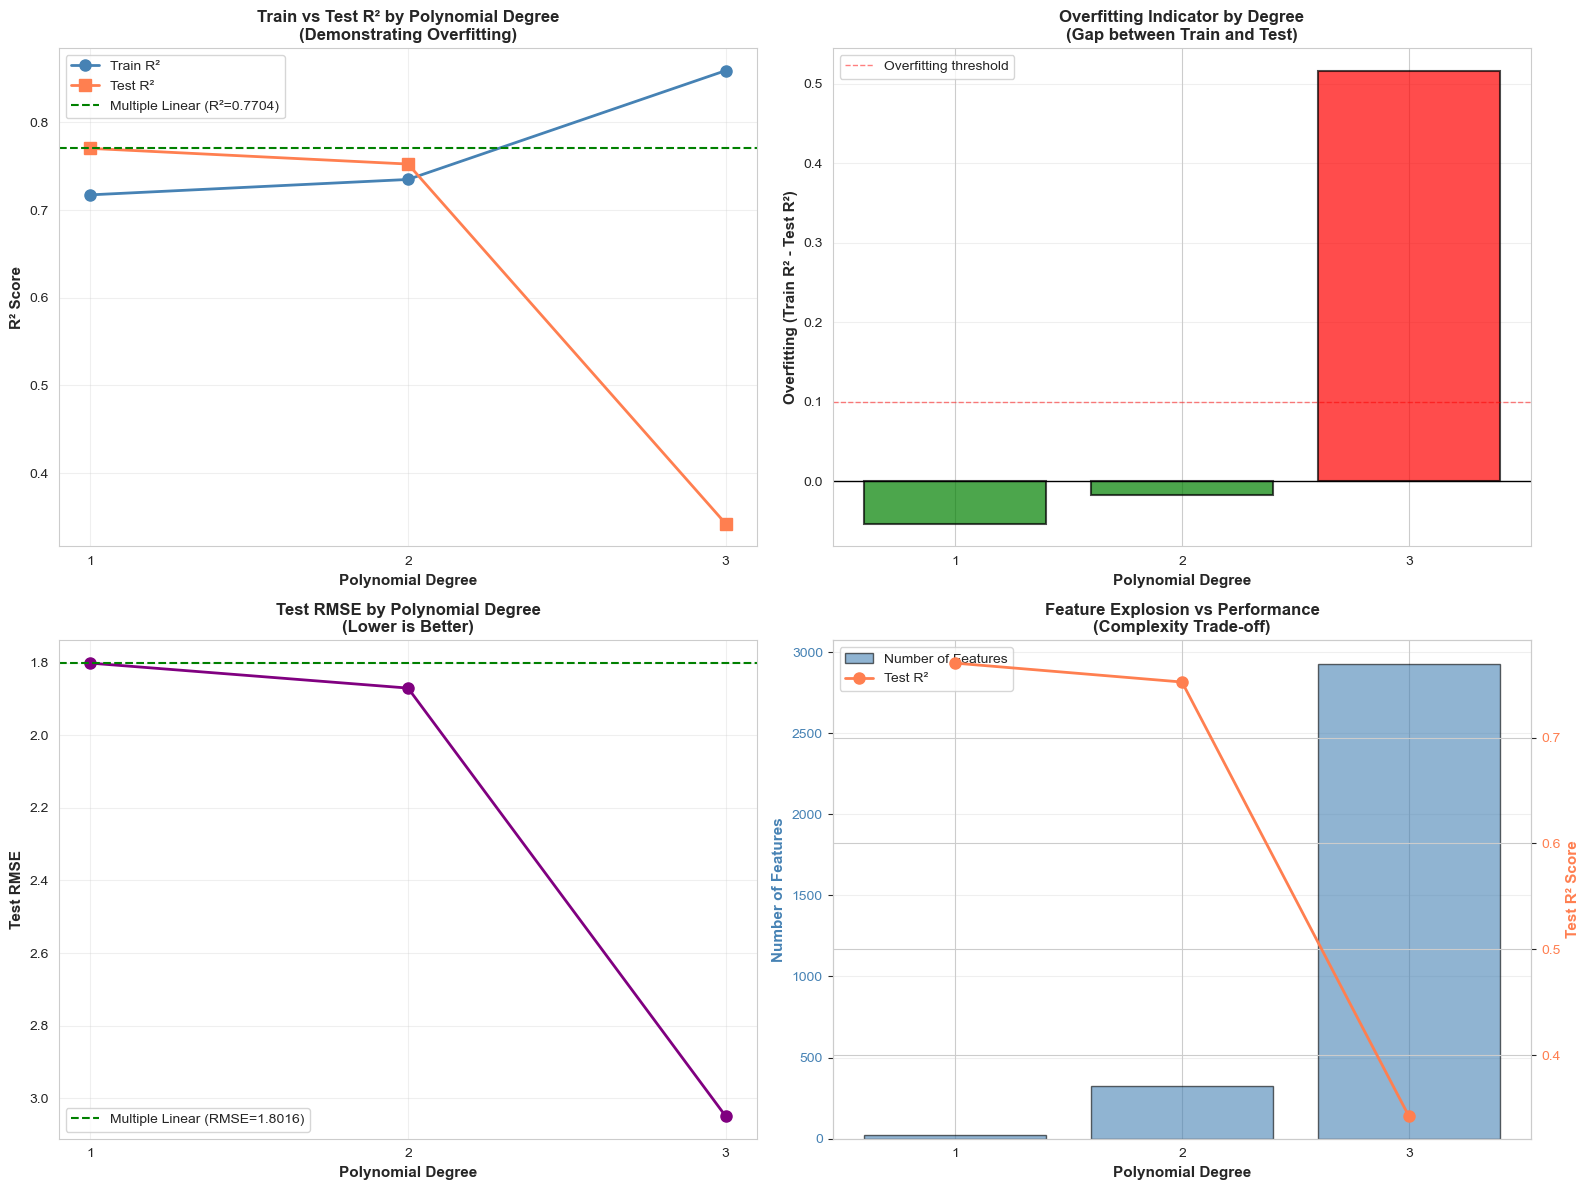


POLYNOMIAL REGRESSION INSIGHTS
--------------------------------------------------------------------------------

1. UNDERFITTING (Low Degree - Degree 1):
   • Degree 1 is equivalent to Multiple Linear Regression
   • Train R²: 0.7174, Test R²: 0.7704
   • May not capture non-linear relationships
   • High bias, low variance

2. OPTIMAL DEGREE:
   • Degree 1 shows best balance (minimal overfitting)
   • Train R²: 0.7174
   • Test R²: 0.7704
   • Overfitting: -0.0530

3. OVERFITTING (High Degree - Degree 3):
   • Degree 3: Train R²: 0.8591, Test R²: 0.3424
   • Gap between train and test performance: 0.5167
   • Number of features: 2925 (from 24 original)
   • Feature explosion: 121.9x
   • Low bias, high variance - model may memorize training data


In [247]:
# Visualizing overfitting/underfitting behavior with different polynomial degrees
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Train vs Test R² by degree
axes[0, 0].plot(poly_summary['Degree'], poly_summary['Train R²'], 
                'o-', label='Train R²', linewidth=2, markersize=8, color='steelblue')
axes[0, 0].plot(poly_summary['Degree'], poly_summary['Test R²'], 
                's-', label='Test R²', linewidth=2, markersize=8, color='coral')
axes[0, 0].axhline(y=results['Multiple_Linear']['test_r2'], 
                   color='green', linestyle='--', linewidth=1.5, 
                   label=f"Multiple Linear (R²={results['Multiple_Linear']['test_r2']:.4f})")
axes[0, 0].set_xlabel('Polynomial Degree', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('R² Score', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Train vs Test R² by Polynomial Degree\n(Demonstrating Overfitting)', 
                     fontsize=12, fontweight='bold')
axes[0, 0].legend(loc='best', fontsize=10)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(poly_summary['Degree'])

# Plot 2: Overfitting indicator (Train R² - Test R²)
axes[0, 1].bar(poly_summary['Degree'], poly_summary['Overfitting'], 
               color=['green' if x < 0.05 else 'orange' if x < 0.1 else 'red' for x in poly_summary['Overfitting']],
               alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0, 1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[0, 1].axhline(y=0.1, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Overfitting threshold')
axes[0, 1].set_xlabel('Polynomial Degree', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Overfitting (Train R² - Test R²)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Overfitting Indicator by Degree\n(Gap between Train and Test)', 
                     fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].set_xticks(poly_summary['Degree'])

# Plot 3: Test RMSE by degree
axes[1, 0].plot(poly_summary['Degree'], poly_summary['Test RMSE'], 
                'o-', linewidth=2, markersize=8, color='purple')
axes[1, 0].axhline(y=results['Multiple_Linear']['test_rmse'], 
                   color='green', linestyle='--', linewidth=1.5,
                   label=f"Multiple Linear (RMSE={results['Multiple_Linear']['test_rmse']:.4f})")
axes[1, 0].set_xlabel('Polynomial Degree', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Test RMSE', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Test RMSE by Polynomial Degree\n(Lower is Better)', 
                     fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(poly_summary['Degree'])
axes[1, 0].invert_yaxis()  # Lower RMSE is better, so invert

# Plot 4: Number of features vs performance
ax2 = axes[1, 1]
ax2_twin = axes[1, 1].twinx()

color1 = 'steelblue'
color2 = 'coral'

ax2.bar(poly_summary['Degree'], poly_summary['Features'], 
        color=color1, alpha=0.6, label='Number of Features', edgecolor='black')
ax2.set_xlabel('Polynomial Degree', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Features', color=color1, fontsize=11, fontweight='bold')
ax2.tick_params(axis='y', labelcolor=color1)

ax2_twin.plot(poly_summary['Degree'], poly_summary['Test R²'], 
              'o-', color=color2, linewidth=2, markersize=8, label='Test R²')
ax2_twin.set_ylabel('Test R² Score', color=color2, fontsize=11, fontweight='bold')
ax2_twin.tick_params(axis='y', labelcolor=color2)

axes[1, 1].set_title('Feature Explosion vs Performance\n(Complexity Trade-off)', 
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(poly_summary['Degree'])

# Add legends
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=10)

axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print insights
print("\nPOLYNOMIAL REGRESSION INSIGHTS")
print("-"*80)
print("\n1. UNDERFITTING (Low Degree - Degree 1):")
print(f"   • Degree 1 is equivalent to Multiple Linear Regression")
print(f"   • Train R²: {polynomial_results[1]['train_r2']:.4f}, Test R²: {polynomial_results[1]['test_r2']:.4f}")
print(f"   • May not capture non-linear relationships")
print(f"   • High bias, low variance")

print("\n2. OPTIMAL DEGREE:")
optimal_degree = int(poly_summary.loc[poly_summary['Overfitting'].idxmin(), 'Degree'])
print(f"   • Degree {optimal_degree} shows best balance (minimal overfitting)")
print(f"   • Train R²: {polynomial_results[optimal_degree]['train_r2']:.4f}")
print(f"   • Test R²: {polynomial_results[optimal_degree]['test_r2']:.4f}")
print(f"   • Overfitting: {polynomial_results[optimal_degree]['overfitting']:.4f}")

print("\n3. OVERFITTING (High Degree - Degree 3):")
high_degree = max(degrees)
print(f"   • Degree {high_degree}: Train R²: {polynomial_results[high_degree]['train_r2']:.4f}, "
      f"Test R²: {polynomial_results[high_degree]['test_r2']:.4f}")
print(f"   • Gap between train and test performance: {polynomial_results[high_degree]['overfitting']:.4f}")
print(f"   • Number of features: {polynomial_results[high_degree]['n_features']} "
      f"(from {X_train_scaled.shape[1]} original)")
print(f"   • Feature explosion: {polynomial_results[high_degree]['n_features'] / X_train_scaled.shape[1]:.1f}x")
if polynomial_results[high_degree]['overfitting'] > 0.1:
    print(f"   • Low bias, high variance - model may memorize training data")
else:
    print(f"   • Shows reasonable generalization despite high feature count")


## Model Comparison and Summary

The below code block compares the performance of all regression models built, including Simple Linear, Multiple Linear, Ridge, Lasso, and Polynomial Regression (degrees 1–3), by compiling key metrics such as Test R², RMSE, MAE, cross-validation R², and an overfitting indicator into a summary table. Visualizations highlight differences in predictive accuracy, error, cross-validation stability, and overfitting across models. From the results, Lasso Regression emerges as the best-performing model with the highest Test R² (0.7705), low RMSE (1.8011), and consistent cross-validation performance, while higher-degree polynomial models show overfitting or poor generalization.


MODEL COMPARISON SUMMARY


--------------------------------------------------------------------------------
PERFORMANCE COMPARISON TABLE
--------------------------------------------------------------------------------
              Model  Test R²  Test RMSE  Test MAE  CV Mean R²  CV Std R²  Overfitting (Train-Test R²)
              Lasso 0.770498   1.801119  0.446244    0.716334   0.034776                    -0.053131
              Ridge 0.770409   1.801469  0.446912    0.716329   0.034783                    -0.053037
    Multiple Linear 0.770372   1.801612  0.447268    0.716323   0.034792                    -0.052998
Polynomial Degree 1 0.770372   1.801612  0.447268    0.716323   0.034792                    -0.052998
Polynomial Degree 2 0.752517   1.870346  0.617395    0.689890   0.035231                    -0.017587
      Simple Linear 0.347616   3.036692  2.107904    0.335108   0.003672                    -0.012375
Polynomial Degree 3 0.342415   3.048771  1.755484   -0.204996   0.28

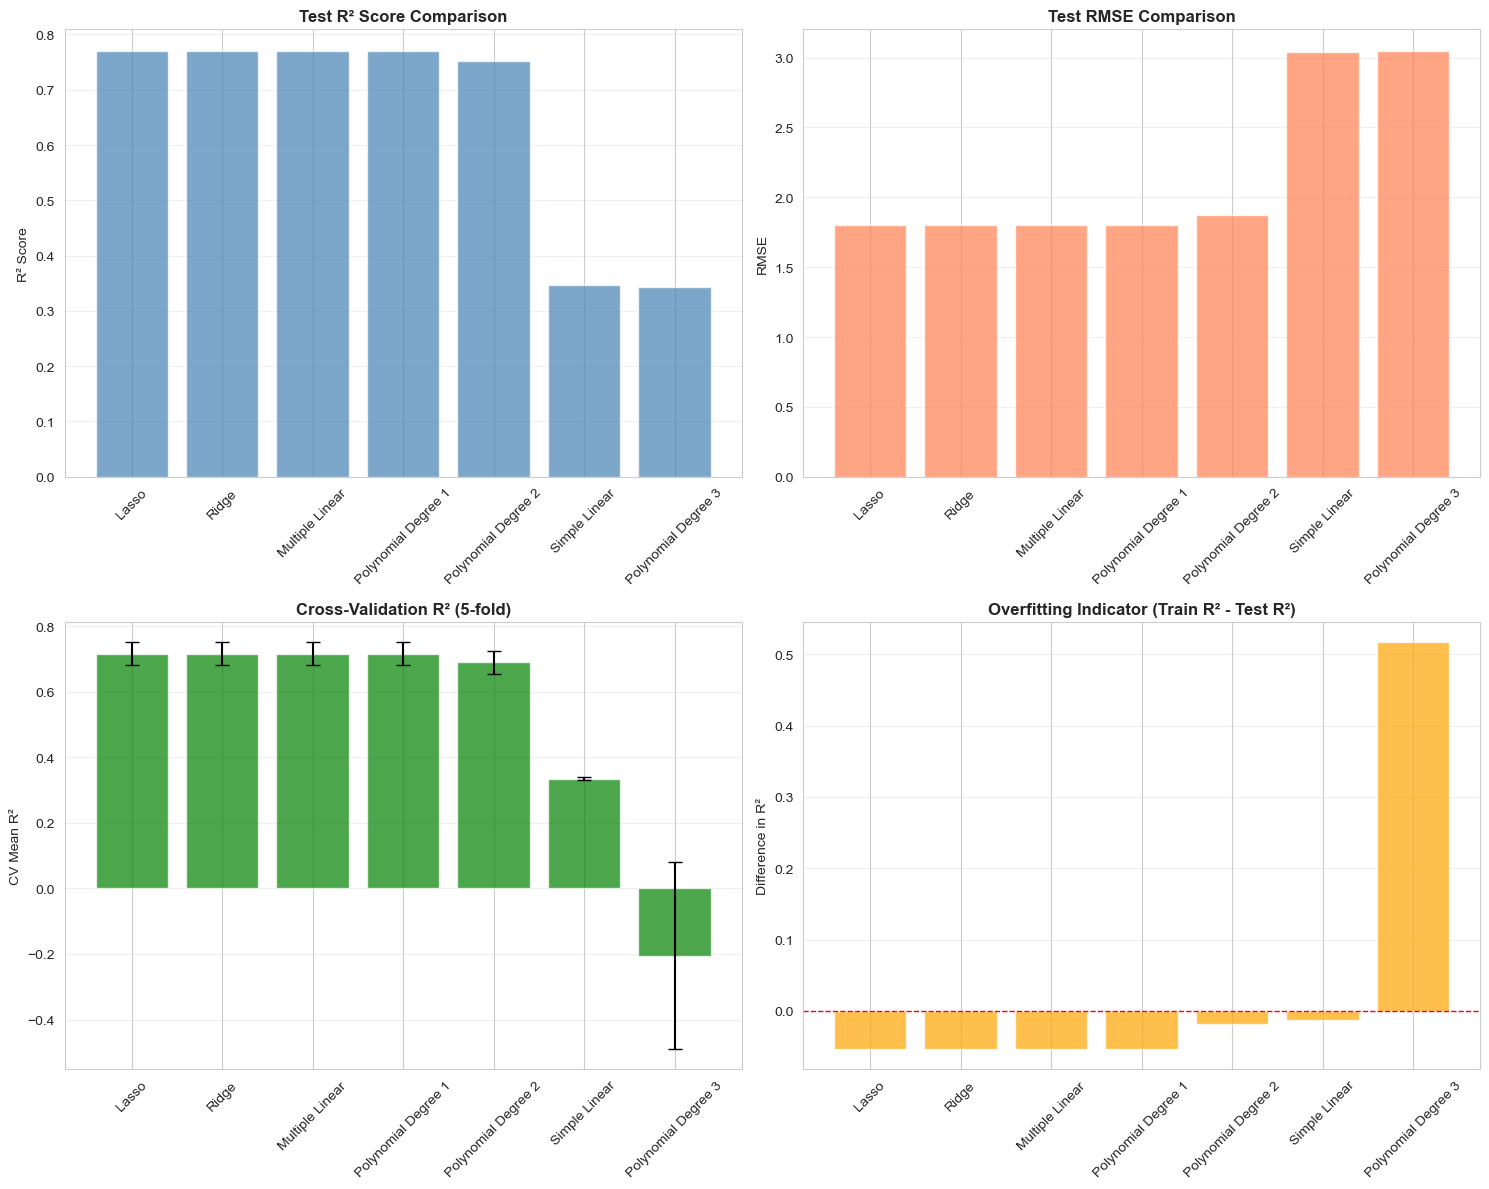

In [248]:
print("MODEL COMPARISON SUMMARY\n")

# Create comparison DataFrame
comparison_data = []
for model_name, res in results.items():
    comparison_data.append({
        'Model': model_name.replace('_', ' ').title(),
        'Model_Key': model_name,  # Store original key for lookup
        'Test R²': res['test_r2'],
        'Test RMSE': res['test_rmse'],
        'Test MAE': res['test_mae'],
        'CV Mean R²': res['cv_mean'],
        'CV Std R²': res['cv_std'],
        'Overfitting (Train-Test R²)': res['train_r2'] - res['test_r2']
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('Test R²', ascending=False)

print("\n" + "-"*80)
print("PERFORMANCE COMPARISON TABLE")
print("-"*80)
# Display without Model_Key column
display_df = comparison_df.drop(columns=['Model_Key'])
print(display_df.to_string(index=False))

# Identify best model
best_model_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_key = comparison_df.loc[best_model_idx, 'Model_Key']

print("\n" + "-"*80)
print("BEST MODEL IDENTIFICATION")
print("-"*80)
print(f"Best Model (by Test R²): {best_model_name}")
print(f"Test R² Score: {comparison_df.loc[best_model_idx, 'Test R²']:.4f}")
print(f"Test RMSE: {comparison_df.loc[best_model_idx, 'Test RMSE']:.4f}")
print(f"CV Mean R²: {comparison_df.loc[best_model_idx, 'CV Mean R²']:.4f} (±{comparison_df.loc[best_model_idx, 'CV Std R²']:.4f})")

# Visual comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# R² Comparison
axes[0, 0].bar(comparison_df['Model'], comparison_df['Test R²'], color='steelblue', alpha=0.7)
axes[0, 0].set_title('Test R² Score Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# RMSE Comparison
axes[0, 1].bar(comparison_df['Model'], comparison_df['Test RMSE'], color='coral', alpha=0.7)
axes[0, 1].set_title('Test RMSE Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Cross-Validation Comparison
x_pos = np.arange(len(comparison_df['Model']))
axes[1, 0].bar(x_pos, comparison_df['CV Mean R²'], yerr=comparison_df['CV Std R²'], 
               color='green', alpha=0.7, capsize=5)
axes[1, 0].set_title('Cross-Validation R² (5-fold)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('CV Mean R²')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(comparison_df['Model'], rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Overfitting Indicator
axes[1, 1].bar(comparison_df['Model'], comparison_df['Overfitting (Train-Test R²)'], 
               color='orange', alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1, 1].set_title('Overfitting Indicator (Train R² - Test R²)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Difference in R²')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## Key Insights and Conclusions

The most important factor in making a good model was adding more features, which boosted performance significantly. While several models ended up at the top, their performance was nearly identical, meaning the special "regularization" techniques didn't offer a real advantage over the standard multiple linear model. The key was finding a balance; the simplest model was too basic, and the most complicated ones performed poorly. The best model seems to be Lasso as it is reliable and can explain about 77% of the variation in exam scores, and its predictions are typically accurate within ±1.8 points.


In [249]:
print("KEY INSIGHTS AND CONCLUSIONS BASED ON NUMERIC VALUES")

print("\n1. MODEL PERFORMANCE RANKING:")
print("-" * 80)
for idx, row in comparison_df.iterrows():
    print(f"   {idx+1}. {row['Model']:25s} - Test R²: {row['Test R²']:.4f}, RMSE: {row['Test RMSE']:.4f}")

print("\n2. FEATURE ENGINEERING IMPACT:")
print("-" * 80)
simple_r2 = results['Simple_Linear']['test_r2']
multiple_r2 = results['Multiple_Linear']['test_r2']
improvement = ((multiple_r2 - simple_r2) / simple_r2) * 100 if simple_r2 != 0 else 0
print(f"   Simple Linear Regression (1 feature):     R² = {simple_r2:.4f}")
print(f"   Multiple Linear Regression ({X_final.shape[1]} features): R² = {multiple_r2:.4f}")
print(f"   Improvement from feature engineering:     {improvement:.2f}% increase in R²")
print(f"   This demonstrates that feature engineering and using multiple features")
print(f"   significantly improves model performance.")

print("\n3. REGULARIZATION EFFECTS:")
print("-" * 80)
multiple_overfitting = results['Multiple_Linear']['train_r2'] - results['Multiple_Linear']['test_r2']
ridge_overfitting = results['Ridge']['train_r2'] - results['Ridge']['test_r2']
lasso_overfitting = results['Lasso']['train_r2'] - results['Lasso']['test_r2']

print(f"   Multiple Linear Regression overfitting: {multiple_overfitting:.4f}")
print(f"   Ridge Regression overfitting:           {ridge_overfitting:.4f}")
print(f"   Lasso Regression overfitting:           {lasso_overfitting:.4f}")

if ridge_overfitting < multiple_overfitting:
    print(f"     Ridge reduces overfitting compared to Multiple Linear Regression")
if lasso_overfitting < multiple_overfitting:
    print(f"     Lasso reduces overfitting compared to Multiple Linear Regression")

print("\n4. CROSS-VALIDATION RELIABILITY:")
print("-" * 80)
for model_name, res in results.items():
    cv_stability = res['cv_std']
    print(f"   {model_name.replace('_', ' ').title():25s}: CV Std = {cv_stability:.4f}")
    if cv_stability < 0.01:
        print(f"       Very stable across folds (low variance)")
    elif cv_stability < 0.02:
        print(f"       Relatively stable across folds")
    else:
        print(f"       Moderate variance across folds")


KEY INSIGHTS AND CONCLUSIONS BASED ON NUMERIC VALUES

1. MODEL PERFORMANCE RANKING:
--------------------------------------------------------------------------------
   4. Lasso                     - Test R²: 0.7705, RMSE: 1.8011
   3. Ridge                     - Test R²: 0.7704, RMSE: 1.8015
   2. Multiple Linear           - Test R²: 0.7704, RMSE: 1.8016
   5. Polynomial Degree 1       - Test R²: 0.7704, RMSE: 1.8016
   6. Polynomial Degree 2       - Test R²: 0.7525, RMSE: 1.8703
   1. Simple Linear             - Test R²: 0.3476, RMSE: 3.0367
   7. Polynomial Degree 3       - Test R²: 0.3424, RMSE: 3.0488

2. FEATURE ENGINEERING IMPACT:
--------------------------------------------------------------------------------
   Simple Linear Regression (1 feature):     R² = 0.3476
   Multiple Linear Regression (24 features): R² = 0.7704
   Improvement from feature engineering:     121.62% increase in R²
   This demonstrates that feature engineering and using multiple features
   significantly i

## Deliverable 3: Part 1: Classification Models

In this section, we will:
1. Prepare the data for classification by creating a target variable from Exam_Score
2. Build three classification models (Decision Tree, k-NN, Naive Bayes)
3. Perform hyperparameter tuning
4. Evaluate models using confusion matrix, ROC curve, and accuracy/F1 scores


In [250]:
# Data Preparation for Classification
# Create a binary target variable based on Exam_Score
# We'll classify students as "High" (>=70) or "Low" (<70) performance
# 70+ is a B or above grade which is reasonable for students performance grouping.

# Creating target variable using this logic.
df['Performance'] = df['Exam_Score'].apply(lambda x: 'High' if x >= 70 else 'Low')
print("Target variable distribution:")
print(df['Performance'].value_counts())
print(f"\nHigh Performance: {(df['Performance'] == 'High').sum() / len(df) * 100:.2f}%")
print(f"Low Performance: {(df['Performance'] == 'Low').sum() / len(df) * 100:.2f}%")

# Separate features and target
# Exclude Exam_Score, Performance, and any visualization-only columns (like Sleep_Category)
exclude_cols = ['Exam_Score', 'Performance']
if 'Sleep_Category' in df.columns:
    exclude_cols.append('Sleep_Category')
feature_cols = [col for col in df.columns if col not in exclude_cols]
X = df[feature_cols]
y = df['Performance']

print(f"\nNumber of features: {len(feature_cols)}")
print(f"Feature columns: {feature_cols}")


Target variable distribution:
Performance
Low     4982
High    1625
Name: count, dtype: int64

High Performance: 24.60%
Low Performance: 75.40%

Number of features: 19
Feature columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


### Preprocessing
In this preprocessing block, we prepare the dataset for machine learning by handling both numerical and categorical features. First, we identify which columns are numerical and which are categorical. Numerical features are standardized using StandardScaler to ensure they share a similar scale, which helps many algorithms perform better. Categorical variables are transformed using OneHotEncoder, converting them into binary indicator columns while dropping the first category to avoid multicollinearity. These transformations are combined into a ColumnTransformer so that both types of data can be processed in a single pipeline. The transformed feature matrix is then generated, and the corresponding feature names are extracted. Next, the target variable is encoded using LabelEncoder to convert class labels into numeric values suitable for modeling. Finally, the processed dataset is split into training and testing sets using an 80/20 ratio with stratification to preserve class balance.

In [251]:
# Preprocessing: Encode categorical variables and scale numerical features
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# Creating preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Transform features
X_processed = preprocessor.fit_transform(X)
feature_names = (numerical_features + 
                list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))

print(f"\nProcessed feature shape: {X_processed.shape}")
print(f"Number of features after encoding: {len(feature_names)}")

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(f"\nTarget encoding: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Numerical features: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
Categorical features: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

Processed feature shape: (6607, 27)
Number of features after encoding: 27

Target encoding: {'High': np.int64(0), 'Low': np.int64(1)}

Training set size: 5285
Test set size: 1322


### Model Training and Performance evaluation(Decision Trees, k-NN, Naïve Bayes)
This block imports key classification models and evaluation metrics, then initializes Decision Tree, k-NN, and Naive Bayes classifiers. Each model is trained on the training set, used to generate predictions, and evaluated using accuracy, F1-score, and a full classification report. The results, including predictions and confusion matrices, are stored for later comparison.

In [252]:
# Import classification models and metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, 
                            f1_score, roc_curve, auc, roc_auc_score)
from sklearn.model_selection import GridSearchCV

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
results = {}

#For each model printing the results here:
for name, model in models.items():
    print(f"For the model type: {name}...")
    print(f"{'-'*60}")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    # Store results
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy,
        'f1': f1,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }


For the model type: Decision Tree...
------------------------------------------------------------

Decision Tree Results:
Accuracy: 0.8570
F1 Score: 0.9041

Classification Report:
              precision    recall  f1-score   support

        High       0.70      0.74      0.72       325
         Low       0.91      0.89      0.90       997

    accuracy                           0.86      1322
   macro avg       0.81      0.82      0.81      1322
weighted avg       0.86      0.86      0.86      1322

For the model type: k-NN...
------------------------------------------------------------

k-NN Results:
Accuracy: 0.8865
F1 Score: 0.9268

Classification Report:
              precision    recall  f1-score   support

        High       0.83      0.68      0.75       325
         Low       0.90      0.95      0.93       997

    accuracy                           0.89      1322
   macro avg       0.86      0.82      0.84      1322
weighted avg       0.88      0.89      0.88      1322

For 

### Model's Result
Across the three models tested, Naive Bayes achieved the highest overall accuracy (0.8964) and F1 score (0.9329), showing strong performance, especially in correctly identifying the "Low" class. The k-NN model also performed well with an accuracy of 0.8865 and an F1 score of 0.9268, though its recall for the "High" class was lower. The Decision Tree model had the lowest accuracy (0.8570) and struggled more with precision and recall for the "High" category compared to the others. Overall, both k-NN and Naive Bayes outperformed the Decision Tree, with Naive Bayes being the best-performing model in this evaluation.

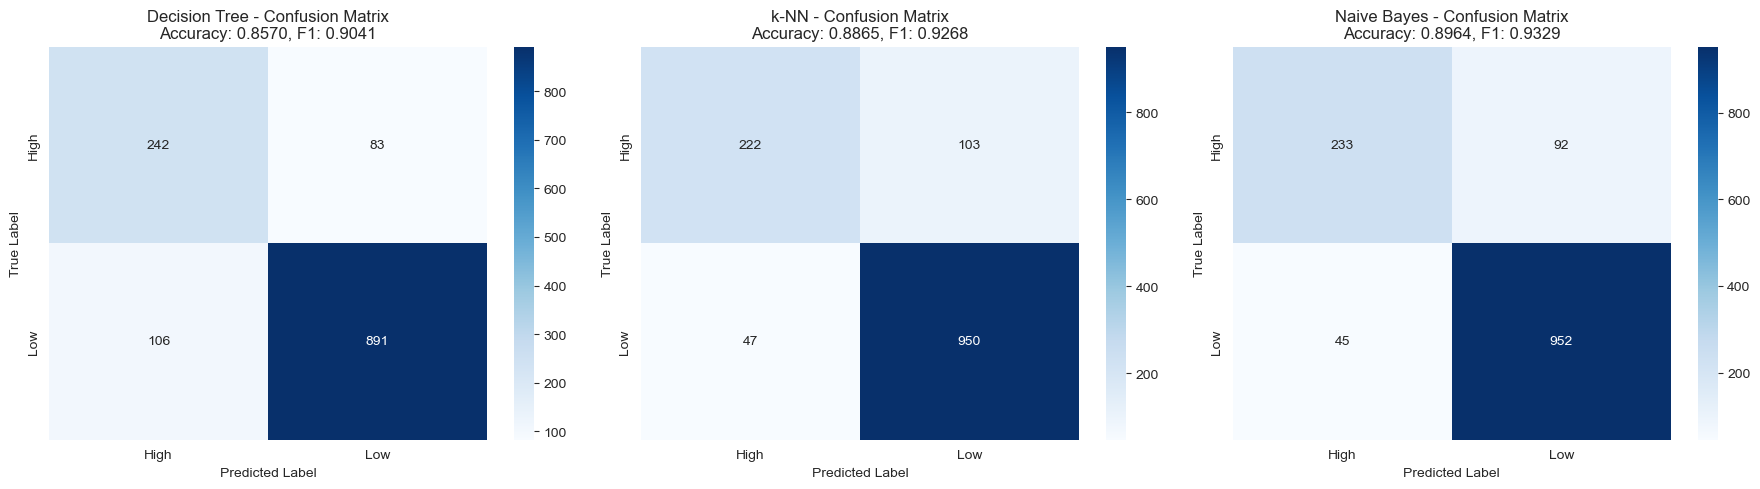

In [253]:
# Visualizing Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    axes[idx].set_title(f'{name} - Confusion Matrix\nAccuracy: {result["accuracy"]:.4f}, F1: {result["f1"]:.4f}')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()


### ROC Curve
Here, ROC (Receiver Operating Characteristic) curve is used to evaluate a classifier’s performance by plotting the true positive rate (recall) against the false positive rate across different thresholds. It visually shows the trade-off between correctly identifying positive cases and incorrectly labeling negatives as positives. The closer the curve is to the top-left corner, the better the model’s performance. Additionally, the Area Under the Curve (AUC) provides a single value summarizing the model’s ability to discriminate between classes, with higher values indicating better performance. ROC curves are commonly used to compare multiple models and select the one with the best balance of sensitivity and specificity.

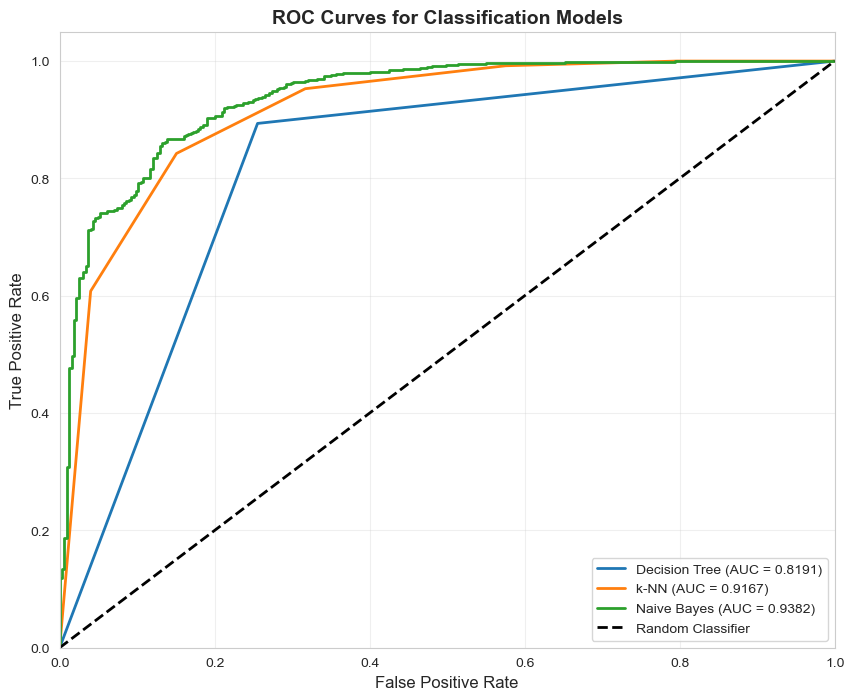

In [254]:
# Plot ROC Curves
plt.figure(figsize=(10, 8))

for name, result in results.items():
    if result['y_pred_proba'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Classification Models', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()


### Hyperparameter Tuning(Naive Bayes)

I have performed hyperparameter tuning for the Naive Bayes classifier using GridSearchCV. Since Naive Bayes showed the best performance among the three models (Accuracy: 0.8964, F1: 0.9329), it makes sense to optimize its hyperparameters to potentially achieve even better results.

This below block performs hyperparameter tuning for the Naive Bayes classifier by testing 100 different values of the var_smoothing parameter using 5-fold cross-validation, resulting in 500 model fits. The best parameter value was identified as 0.0811, which produced a cross-validated F1 score of 0.9494. When evaluated on the test set, the tuned Naive Bayes model achieved higher performance, with an accuracy of 0.9281 and an F1 score of 0.9536, compared to the original model’s 0.8964 accuracy and 0.9329 F1. This tuning led to noticeable improvements in both F1 score (0.0208) and accuracy (0.0318), demonstrating the effectiveness of hyperparameter optimization.


In [255]:
# Hyperparameter Tuning for Naive Bayes
print("Performing Hyperparameter Tuning for Naive Bayes...")
print("-"*60)

# Define parameter grid for GaussianNB
# The main hyperparameter for GaussianNB is var_smoothing
# It adds a small value to the variance to prevent numerical instability
# We'll test a range of values on a log scale
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Range from 1e0 to 1e-9
}

# Create base model
nb_base = GaussianNB()

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    nb_base, 
    param_grid, 
    cv=5, 
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best parameters
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation F1 Score: {grid_search.best_score_:.4f}")

# Evaluate best model on test set
best_nb = grid_search.best_estimator_
y_pred_tuned = best_nb.predict(X_test)
y_pred_proba_tuned = best_nb.predict_proba(X_test)[:, 1]

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print(f"\nTuned Naive Bayes - Test Set Performance:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")

# Compare with original
print(f"\nComparison:")
print(f"Original Naive Bayes - Accuracy: {results['Naive Bayes']['accuracy']:.4f}, F1: {results['Naive Bayes']['f1']:.4f}")
print(f"Tuned Naive Bayes   - Accuracy: {accuracy_tuned:.4f}, F1: {f1_tuned:.4f}")
print(f"Improvement in F1: {(f1_tuned - results['Naive Bayes']['f1']):.4f}")
print(f"Improvement in Accuracy: {(accuracy_tuned - results['Naive Bayes']['accuracy']):.4f}")

# Update results
results['Naive Bayes (Tuned)'] = {
    'model': best_nb,
    'y_pred': y_pred_tuned,
    'y_pred_proba': y_pred_proba_tuned,
    'accuracy': accuracy_tuned,
    'f1': f1_tuned,
    'confusion_matrix': confusion_matrix(y_test, y_pred_tuned)
}


Performing Hyperparameter Tuning for Naive Bayes...
------------------------------------------------------------
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Best Parameters: {'var_smoothing': np.float64(0.08111308307896872)}
Best Cross-Validation F1 Score: 0.9494

Tuned Naive Bayes - Test Set Performance:
Accuracy: 0.9281
F1 Score: 0.9536

Comparison:
Original Naive Bayes - Accuracy: 0.8964, F1: 0.9329
Tuned Naive Bayes   - Accuracy: 0.9281, F1: 0.9536
Improvement in F1: 0.0208
Improvement in Accuracy: 0.0318


## Part 2: Clustering Models

In this section, we will:
1. Prepare data for clustering
2. Build K-Means and Hierarchical clustering models
3. Visualize clustering results
4. Analyze and explain the identified groups


In [256]:
# Prepare data for clustering
# Use numerical features and encode categorical features
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Prepare clustering dataset (use all features)
X_cluster = preprocessor.fit_transform(X)

print(f"Clustering dataset shape: {X_cluster.shape}")
print(f"Features used for clustering: {len(feature_names)}")


Clustering dataset shape: (6607, 27)
Features used for clustering: 27


Evaluating optimal number of clusters...
K=2: Inertia=62971.27, Silhouette=0.0717
K=3: Inertia=59808.72, Silhouette=0.0660
K=4: Inertia=57284.36, Silhouette=0.0616
K=5: Inertia=55340.31, Silhouette=0.0616
K=6: Inertia=53748.93, Silhouette=0.0600
K=7: Inertia=52450.59, Silhouette=0.0589
K=8: Inertia=51411.67, Silhouette=0.0571
K=9: Inertia=50523.90, Silhouette=0.0570
K=10: Inertia=49682.91, Silhouette=0.0565


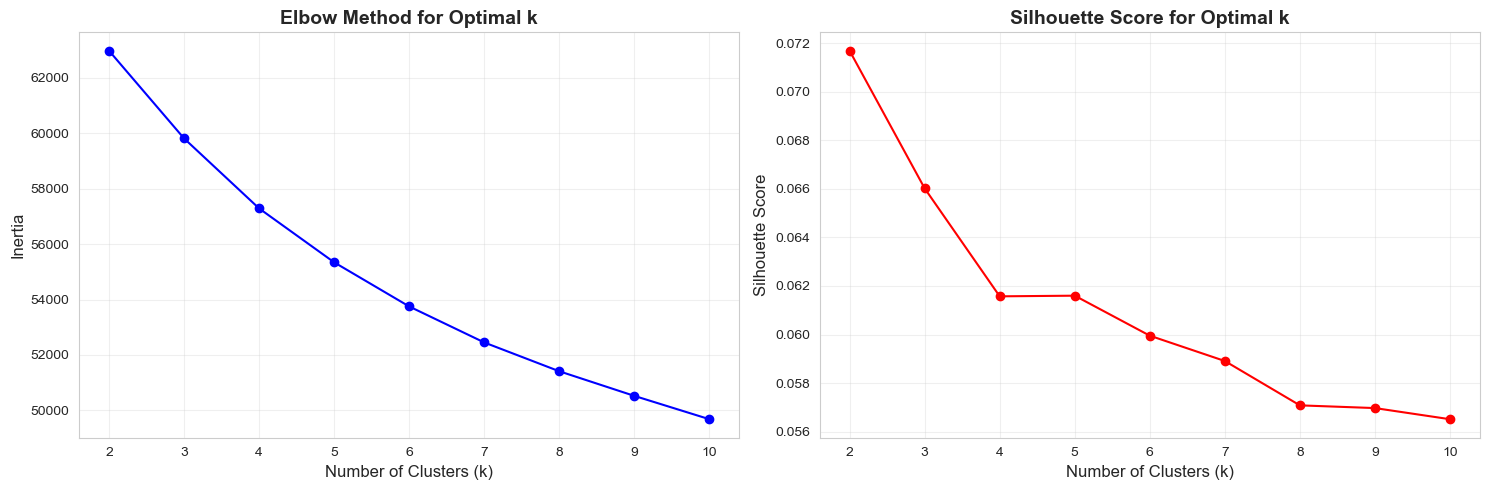


Optimal number of clusters (based on Silhouette Score): 2


In [257]:
# Determining optimal number of clusters using Elbow Method and Silhouette Score
inertias = []
silhouette_scores = []
K_range = range(2, 11)

print("Evaluating optimal number of clusters...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, kmeans.labels_))
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.4f}")

# Plot Elbow Method and Silhouette Score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow Method
ax1.plot(K_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia', fontsize=12)
ax1.set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Silhouette Score
ax2.plot(K_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score for Optimal k', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters (based on Silhouette Score): {optimal_k}")


In [258]:
# K-Means Clustering
print("K-Means Clustering")
print("-"*60)

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_cluster)

# Add cluster labels to dataframe
df['KMeans_Cluster'] = kmeans_labels

# Evaluate clustering
kmeans_silhouette = silhouette_score(X_cluster, kmeans_labels)
kmeans_db = davies_bouldin_score(X_cluster, kmeans_labels)

print(f"Number of clusters: {optimal_k}")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Davies-Bouldin Index: {kmeans_db:.4f}")

# Cluster distribution
print(f"\nCluster Distribution:")
for i in range(optimal_k):
    count = np.sum(kmeans_labels == i)
    print(f"Cluster {i}: {count} students ({count/len(df)*100:.2f}%)")


K-Means Clustering
------------------------------------------------------------
Number of clusters: 2
Silhouette Score: 0.0717
Davies-Bouldin Index: 3.5091

Cluster Distribution:
Cluster 0: 3354 students (50.76%)
Cluster 1: 3253 students (49.24%)


In [259]:
# Hierarchical Clustering
print("Hierarchical Clustering")
print("-"*60)

hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_cluster)

# Add cluster labels to dataframe
df['Hierarchical_Cluster'] = hierarchical_labels

# Evaluate clustering
hierarchical_silhouette = silhouette_score(X_cluster, hierarchical_labels)
hierarchical_db = davies_bouldin_score(X_cluster, hierarchical_labels)

print(f"Number of clusters: {optimal_k}")
print(f"Silhouette Score: {hierarchical_silhouette:.4f}")
print(f"Davies-Bouldin Index: {hierarchical_db:.4f} (lower is better)")

# Cluster distribution
print(f"\nCluster Distribution:")
for i in range(optimal_k):
    count = np.sum(hierarchical_labels == i)
    print(f"Cluster {i}: {count} students ({count/len(df)*100:.2f}%)")


Hierarchical Clustering
------------------------------------------------------------
Number of clusters: 2
Silhouette Score: 0.0408
Davies-Bouldin Index: 4.7368 (lower is better)

Cluster Distribution:
Cluster 0: 3347 students (50.66%)
Cluster 1: 3260 students (49.34%)


PCA explained variance ratio: [0.10214236 0.09993856]
Total variance explained: 0.2021


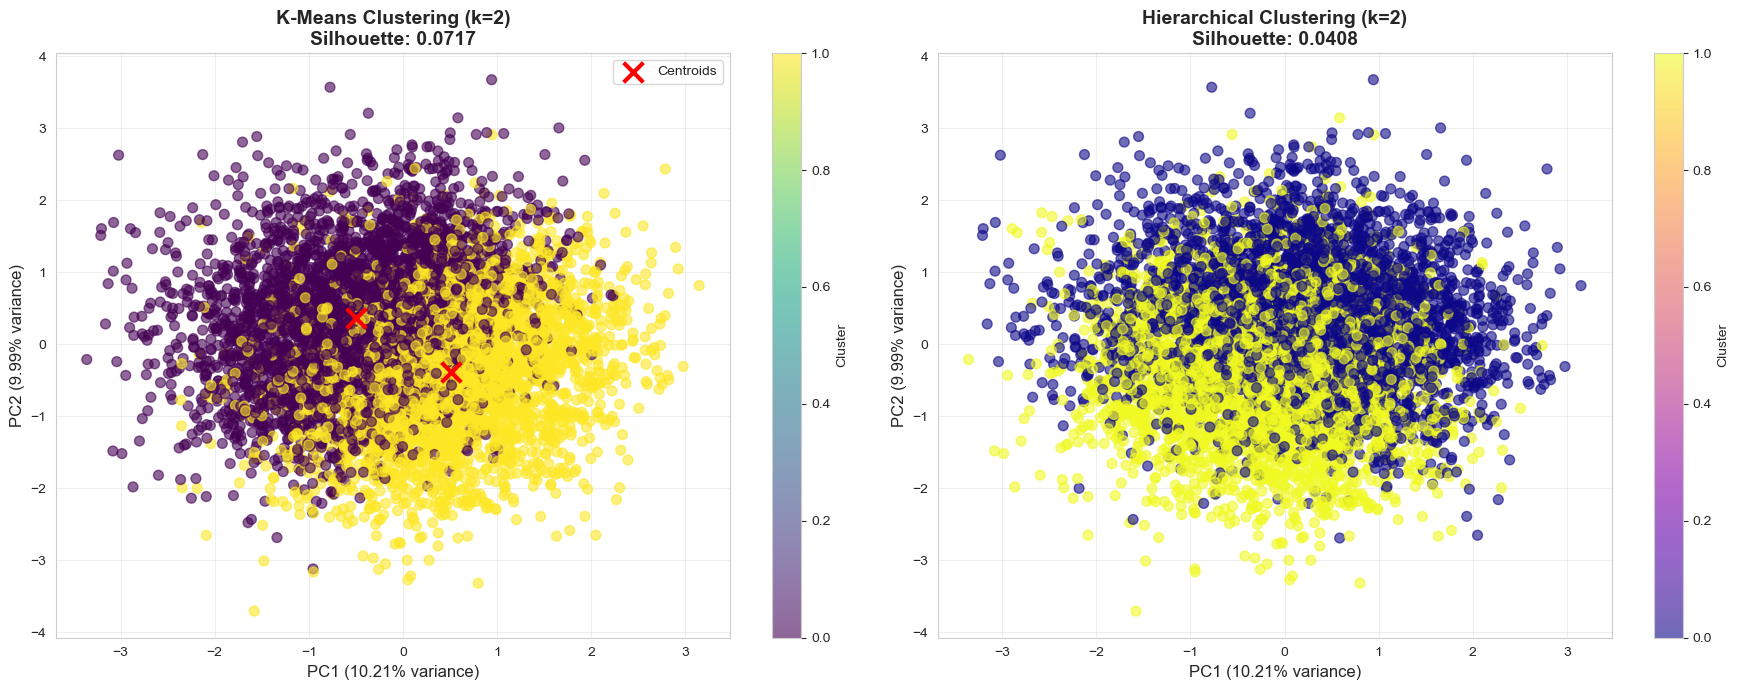

In [260]:
# Visualize Clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster)

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.4f}")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# K-Means visualization
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, 
                          cmap='viridis', alpha=0.6, s=50)
# Transform cluster centers to PCA space
centers_pca = pca.transform(kmeans.cluster_centers_)
axes[0].scatter(centers_pca[:, 0], centers_pca[:, 1],
                c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[0].set_title(f'K-Means Clustering (k={optimal_k})\nSilhouette: {kmeans_silhouette:.4f}', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Hierarchical visualization
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, 
                          cmap='plasma', alpha=0.6, s=50)
axes[1].set_title(f'Hierarchical Clustering (k={optimal_k})\nSilhouette: {hierarchical_silhouette:.4f}', 
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.colorbar(scatter1, ax=axes[0], label='Cluster')
plt.colorbar(scatter2, ax=axes[1], label='Cluster')
plt.tight_layout()
plt.show()


### Visualization for Hierarchical Clustering

Creating dendrogram with 100 samples...


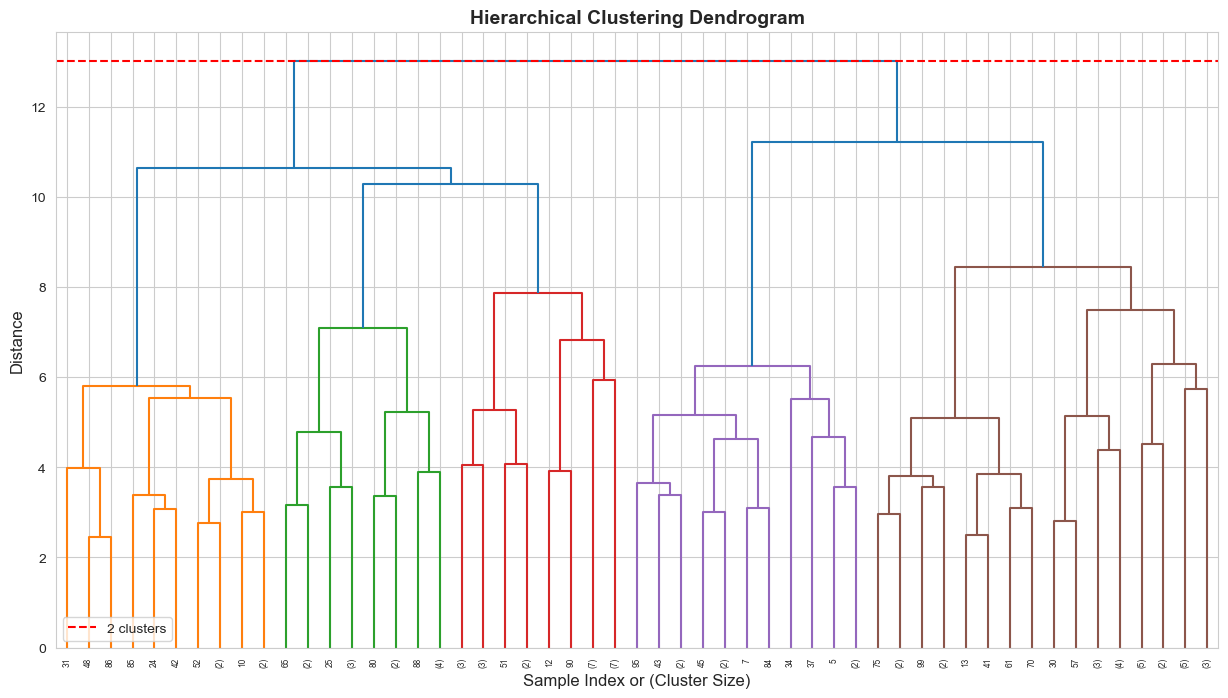

In [261]:
# Visualizing Hierarchical Clustering Dendrogram
# Using a sample for dendrogram visualization (full dataset is too large)
sample_size = min(100, len(X_cluster))
sample_indices = np.random.choice(len(X_cluster), sample_size, replace=False)
X_sample = X_cluster[sample_indices]

print(f"Creating dendrogram with {sample_size} samples...")
linkage_matrix = linkage(X_sample, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14, fontweight='bold')
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=linkage_matrix[-optimal_k+1, 2], color='r', linestyle='--', 
            label=f'{optimal_k} clusters')
plt.legend()
plt.show()


### Hierarchical Clustering: Feature Comparison Heatmap

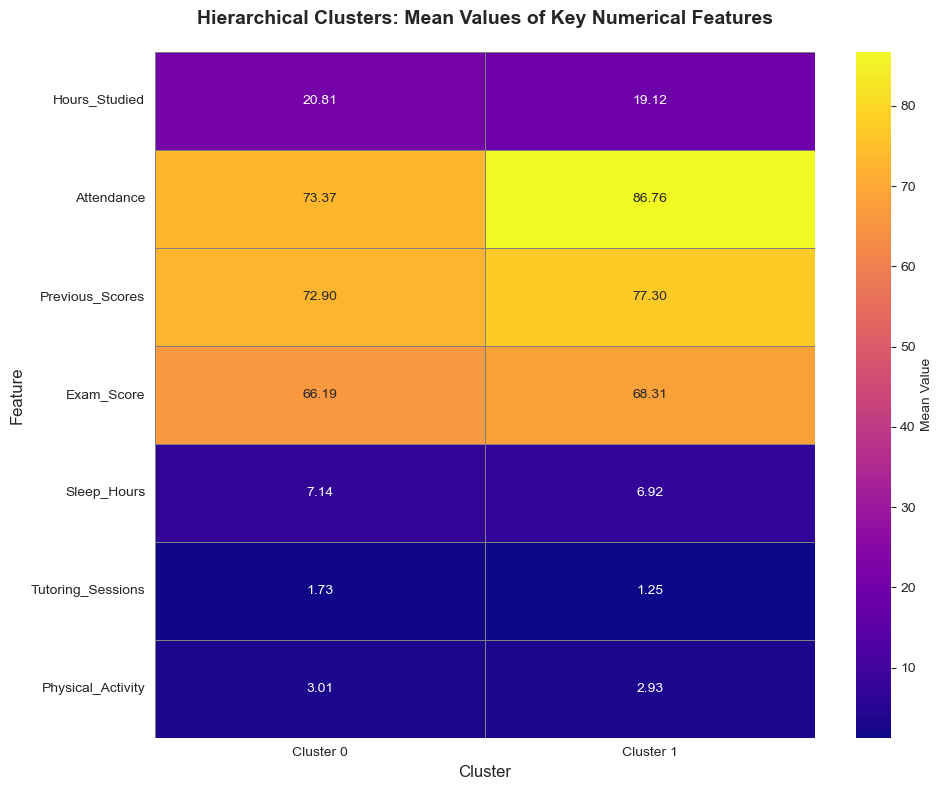

In [262]:
key_numerical_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score', 
                          'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']

# Calculate mean values for each hierarchical cluster
hierarchical_cluster_means = pd.DataFrame()
for cluster_id in range(optimal_k):
    cluster_data = df[df['Hierarchical_Cluster'] == cluster_id]
    hierarchical_cluster_means[f'Cluster {cluster_id}'] = cluster_data[key_numerical_features].mean()

hierarchical_cluster_means.index = key_numerical_features

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(hierarchical_cluster_means, annot=True, fmt='.2f', cmap='plasma', 
            cbar_kws={'label': 'Mean Value'}, linewidths=0.5, linecolor='gray')
plt.title('Hierarchical Clusters: Mean Values of Key Numerical Features', 
         fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


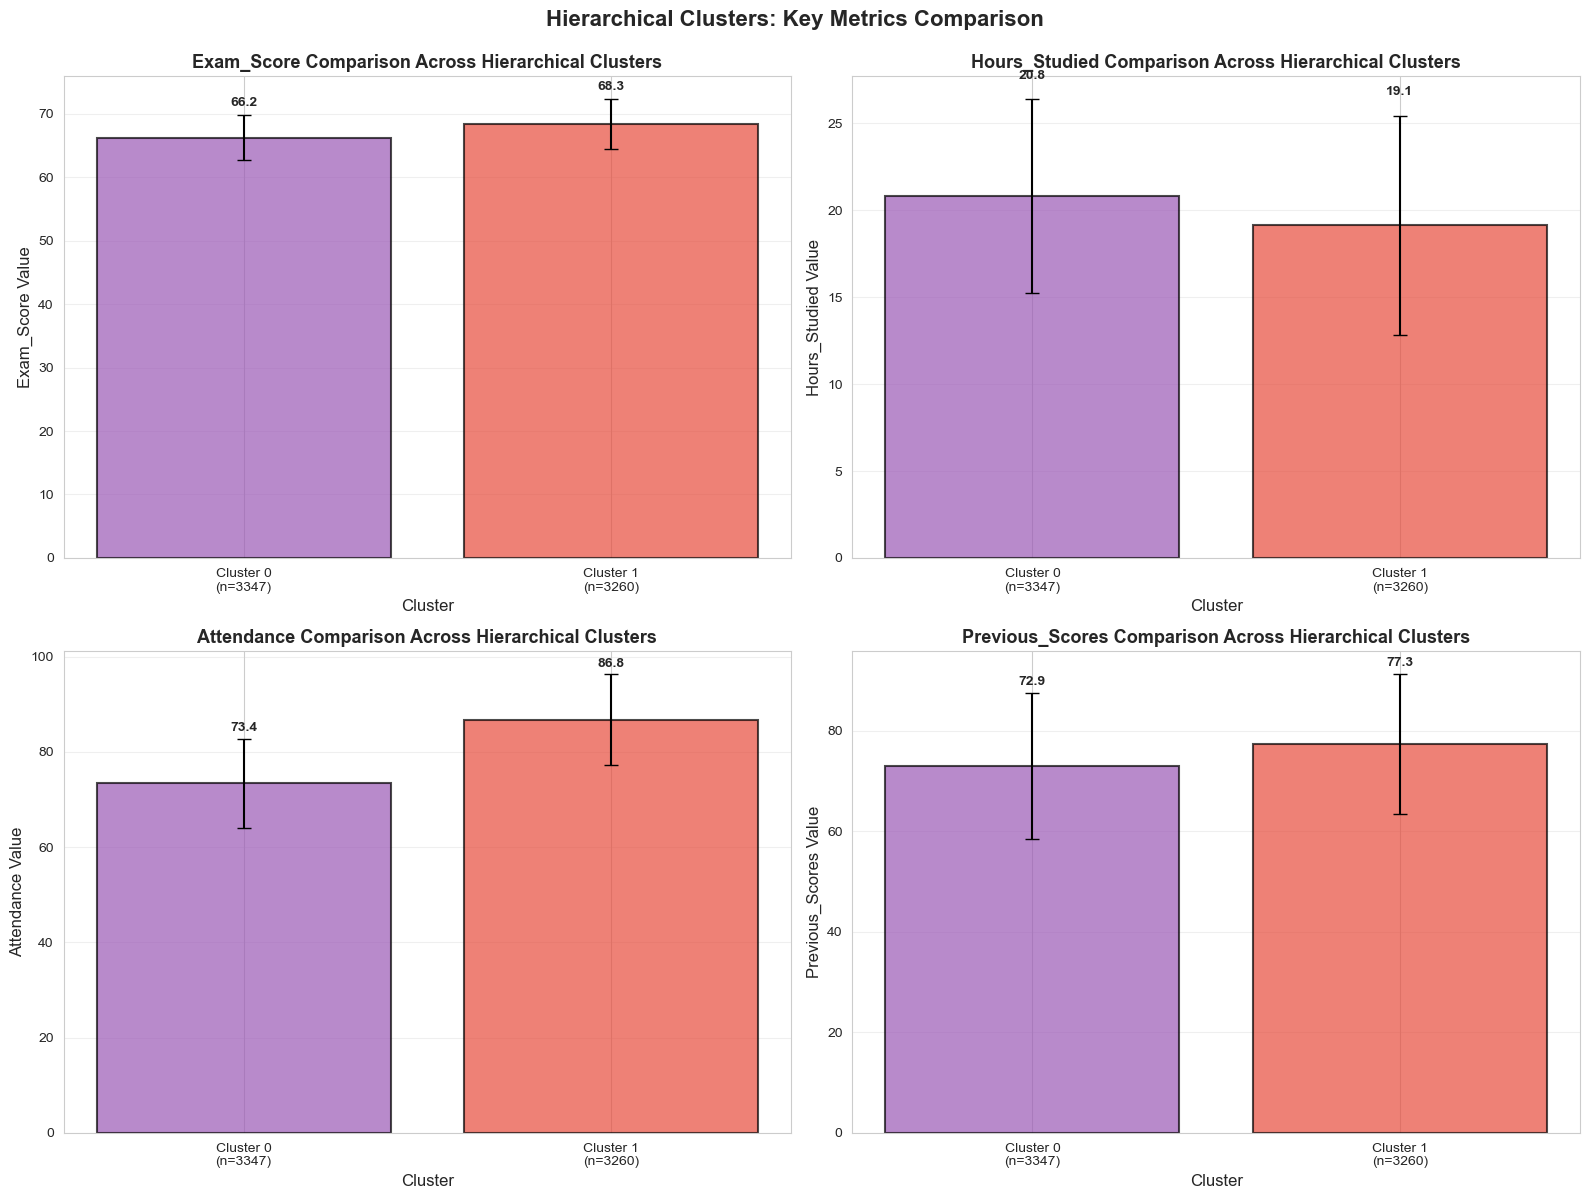

In [263]:
# Hierarchical Clustering: Side-by-Side Comparison of Key Metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Prepare data for comparison
comparison_features = ['Exam_Score', 'Hours_Studied', 'Attendance', 'Previous_Scores']
colors_list = ['#9b59b6', '#e74c3c', '#3498db', '#2ecc71']

for idx, feature in enumerate(comparison_features):
    ax = axes[idx // 2, idx % 2]
    
    # Calculate means and std for each hierarchical cluster
    cluster_stats = []
    cluster_labels = []
    for cluster_id in range(optimal_k):
        cluster_data = df[df['Hierarchical_Cluster'] == cluster_id][feature]
        cluster_stats.append({
            'mean': cluster_data.mean(),
            'std': cluster_data.std(),
            'min': cluster_data.min(),
            'max': cluster_data.max()
        })
        cluster_labels.append(f'Cluster {cluster_id}\n(n={len(cluster_data)})')
    
    # Create grouped bar chart
    x = np.arange(optimal_k)
    means = [stat['mean'] for stat in cluster_stats]
    stds = [stat['std'] for stat in cluster_stats]
    
    bars = ax.bar(x, means, yerr=stds, capsize=5, alpha=0.7, 
                  color=colors_list[:optimal_k], edgecolor='black', linewidth=1.5)
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel(f'{feature} Value', fontsize=12)
    ax.set_title(f'{feature} Comparison Across Hierarchical Clusters', fontsize=13, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(cluster_labels)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, (bar, mean_val) in enumerate(zip(bars, means)):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + stds[i] + 1,
               f'{mean_val:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Hierarchical Clusters: Key Metrics Comparison', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


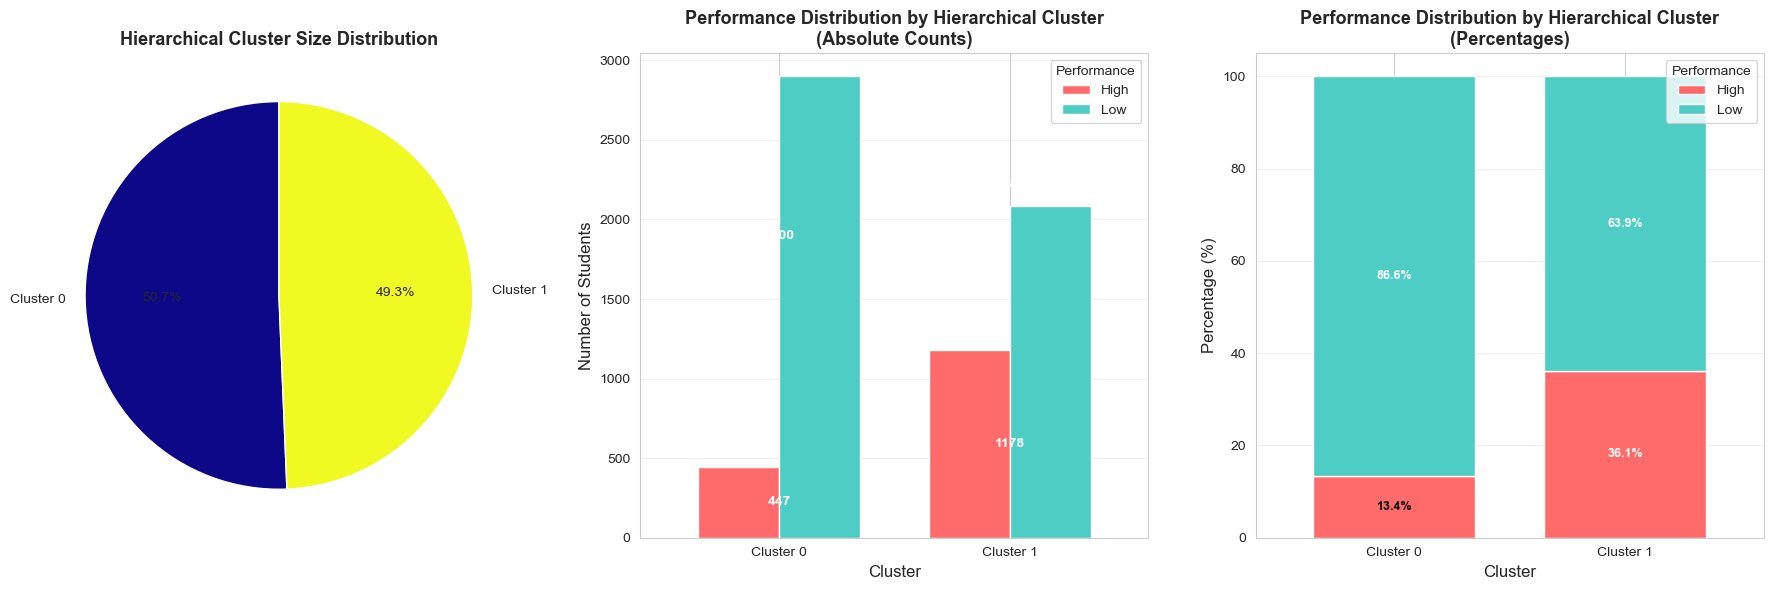

In [264]:
# Hierarchical Clustering: Cluster Size Distribution and Performance Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Cluster Size Distribution (Pie Chart)
hierarchical_cluster_counts = df['Hierarchical_Cluster'].value_counts().sort_index()
colors_hier = plt.cm.plasma(np.linspace(0, 1, optimal_k))
axes[0].pie(hierarchical_cluster_counts.values, 
            labels=[f'Cluster {i}' for i in hierarchical_cluster_counts.index], 
            autopct='%1.1f%%', colors=colors_hier, startangle=90)
axes[0].set_title('Hierarchical Cluster Size Distribution', fontsize=13, fontweight='bold')

# 2. Performance Distribution (Absolute Counts)
performance_hier_crosstab = pd.crosstab(df['Hierarchical_Cluster'], df['Performance'])
performance_hier_crosstab.plot(kind='bar', ax=axes[1], color=['#ff6b6b', '#4ecdc4'], width=0.7)
axes[1].set_title('Performance Distribution by Hierarchical Cluster\n(Absolute Counts)', 
                 fontsize=13, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Number of Students', fontsize=12)
axes[1].set_xticklabels([f'Cluster {i}' for i in range(optimal_k)], rotation=0)
axes[1].legend(title='Performance', fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels
for i in range(optimal_k):
    for j, perf in enumerate(['High', 'Low']):
        value = performance_hier_crosstab.loc[i, perf]
        axes[1].text(i, value/2 if j == 0 else performance_hier_crosstab.loc[i, 'High'] + value/2,
                    f'{value}', ha='center', va='center', fontsize=10, fontweight='bold',
                    color='white' if value > 100 else 'black')

# 3. Performance Distribution (Percentages)
performance_hier_crosstab_pct = pd.crosstab(df['Hierarchical_Cluster'], df['Performance'], normalize='index') * 100
performance_hier_crosstab_pct.plot(kind='bar', stacked=True, ax=axes[2], 
                                   color=['#ff6b6b', '#4ecdc4'], width=0.7)
axes[2].set_title('Performance Distribution by Hierarchical Cluster\n(Percentages)', 
                 fontsize=13, fontweight='bold')
axes[2].set_xlabel('Cluster', fontsize=12)
axes[2].set_ylabel('Percentage (%)', fontsize=12)
axes[2].set_xticklabels([f'Cluster {i}' for i in range(optimal_k)], rotation=0)
axes[2].legend(title='Performance', fontsize=10)
axes[2].grid(True, alpha=0.3, axis='y')

# Add percentage labels
for i in range(optimal_k):
    y_pos = 0
    for j, perf in enumerate(['High', 'Low']):
        pct = performance_hier_crosstab_pct.loc[i, perf]
        if pct > 5:  # Only label if percentage is significant
            axes[2].text(i, y_pos + pct/2, f'{pct:.1f}%', 
                        ha='center', va='center', fontsize=9, fontweight='bold',
                        color='white' if pct > 30 else 'black')
        y_pos += pct

plt.tight_layout()
plt.show()


### Analysis and Visualization of K-Means Clustering

In [265]:
# Analyzing cluster characteristics
print("K-Means Cluster Analysis")
print("-"*60)

# Key features to analyze
key_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score', 
                'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']

for cluster_id in range(optimal_k):
    cluster_data = df[df['KMeans_Cluster'] == cluster_id]
    print(f"\n--- Cluster {cluster_id} ({len(cluster_data)} students) ---")
    
    # Numerical features
    print("\nNumerical Features (Mean):")
    for feat in key_features:
        if feat in df.columns:
            print(f"  {feat}: {cluster_data[feat].mean():.2f}")
    
    # Categorical features
    print("\nCategorical Features (Mode):")
    cat_features = ['Parental_Involvement', 'Motivation_Level', 'Access_to_Resources', 
                    'Family_Income', 'Teacher_Quality', 'School_Type']
    for feat in cat_features:
        if feat in df.columns:
            mode_val = cluster_data[feat].mode()[0] if not cluster_data[feat].mode().empty else 'N/A'
            mode_pct = (cluster_data[feat] == mode_val).sum() / len(cluster_data) * 100
            print(f"  {feat}: {mode_val} ({mode_pct:.1f}%)")
    
    print(f"\nAverage Exam Score: {cluster_data['Exam_Score'].mean():.2f}")
    print(f"Performance Distribution:")
    if 'Performance' in df.columns:
        print(cluster_data['Performance'].value_counts().to_dict())


K-Means Cluster Analysis
------------------------------------------------------------

--- Cluster 0 (3354 students) ---

Numerical Features (Mean):
  Hours_Studied: 19.67
  Attendance: 80.81
  Previous_Scores: 62.87
  Exam_Score: 66.74
  Sleep_Hours: 7.09
  Tutoring_Sessions: 1.54
  Physical_Activity: 3.02

Categorical Features (Mode):
  Parental_Involvement: Medium (51.3%)
  Motivation_Level: Medium (50.8%)
  Access_to_Resources: Medium (49.6%)
  Family_Income: Low (40.4%)
  Teacher_Quality: Medium (61.5%)
  School_Type: Public (68.8%)

Average Exam Score: 66.74
Performance Distribution:
{'Low': 2683, 'High': 671}

--- Cluster 1 (3253 students) ---

Numerical Features (Mean):
  Hours_Studied: 20.29
  Attendance: 79.12
  Previous_Scores: 87.65
  Exam_Score: 67.75
  Sleep_Hours: 6.96
  Tutoring_Sessions: 1.44
  Physical_Activity: 2.92

Categorical Features (Mode):
  Parental_Involvement: Medium (50.4%)
  Motivation_Level: Medium (50.6%)
  Access_to_Resources: Medium (50.9%)
  Family_In

### Insights based on cluster results
The K-Means clustering reveals two student groups with slightly different characteristics and exam performance. Cluster 0, with 3,354 students, has lower previous scores and slightly fewer study hours, resulting in a lower average exam score (66.74) and a higher proportion of low-performing students. Cluster 1, with 3,253 students, shows higher previous scores and marginally more study hours, yielding a slightly higher average exam score (67.75) and more high-performing students. Other factors like parental involvement, motivation, access to resources, and teacher quality are largely similar across clusters, suggesting that while study habits and prior scores contribute to differences, most other variables are fairly consistent.

### K-Means Clustering Heatmap Visualization


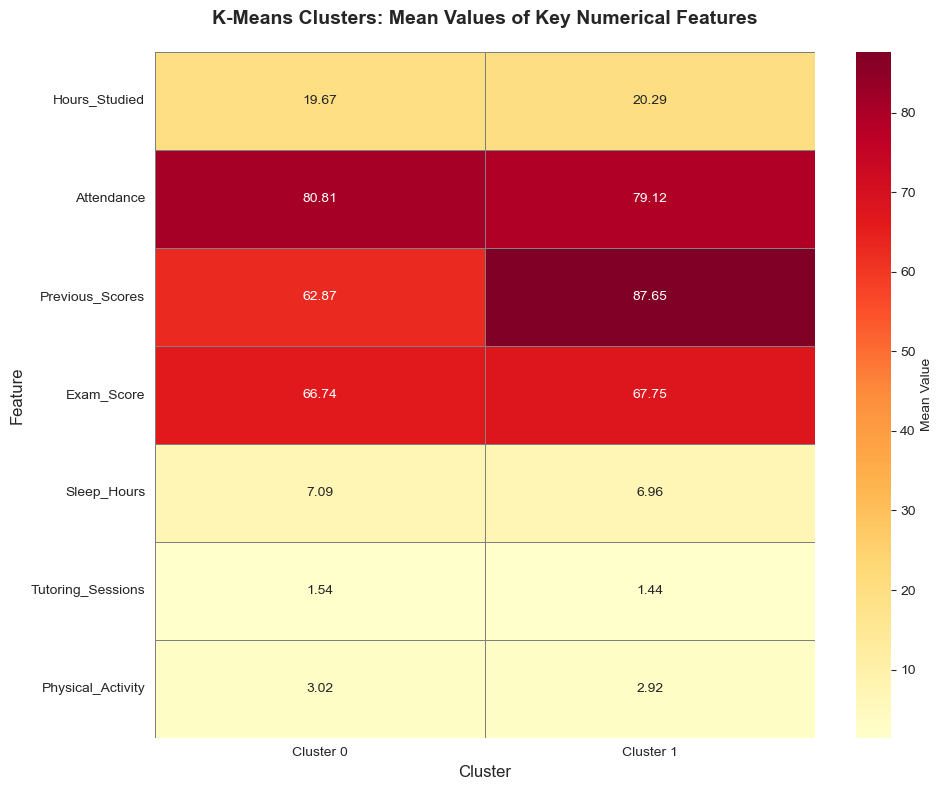

In [266]:
# 2. Heatmap: Key Numerical Features Comparison Across Clusters
key_numerical_features = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score', 
                          'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']

# Calculate mean values for each cluster
cluster_means = pd.DataFrame()
for cluster_id in range(optimal_k):
    cluster_data = df[df['KMeans_Cluster'] == cluster_id]
    cluster_means[f'Cluster {cluster_id}'] = cluster_data[key_numerical_features].mean()

cluster_means.index = key_numerical_features

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cluster_means, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Mean Value'}, linewidths=0.5, linecolor='gray')
plt.title('K-Means Clusters: Mean Values of Key Numerical Features', 
         fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


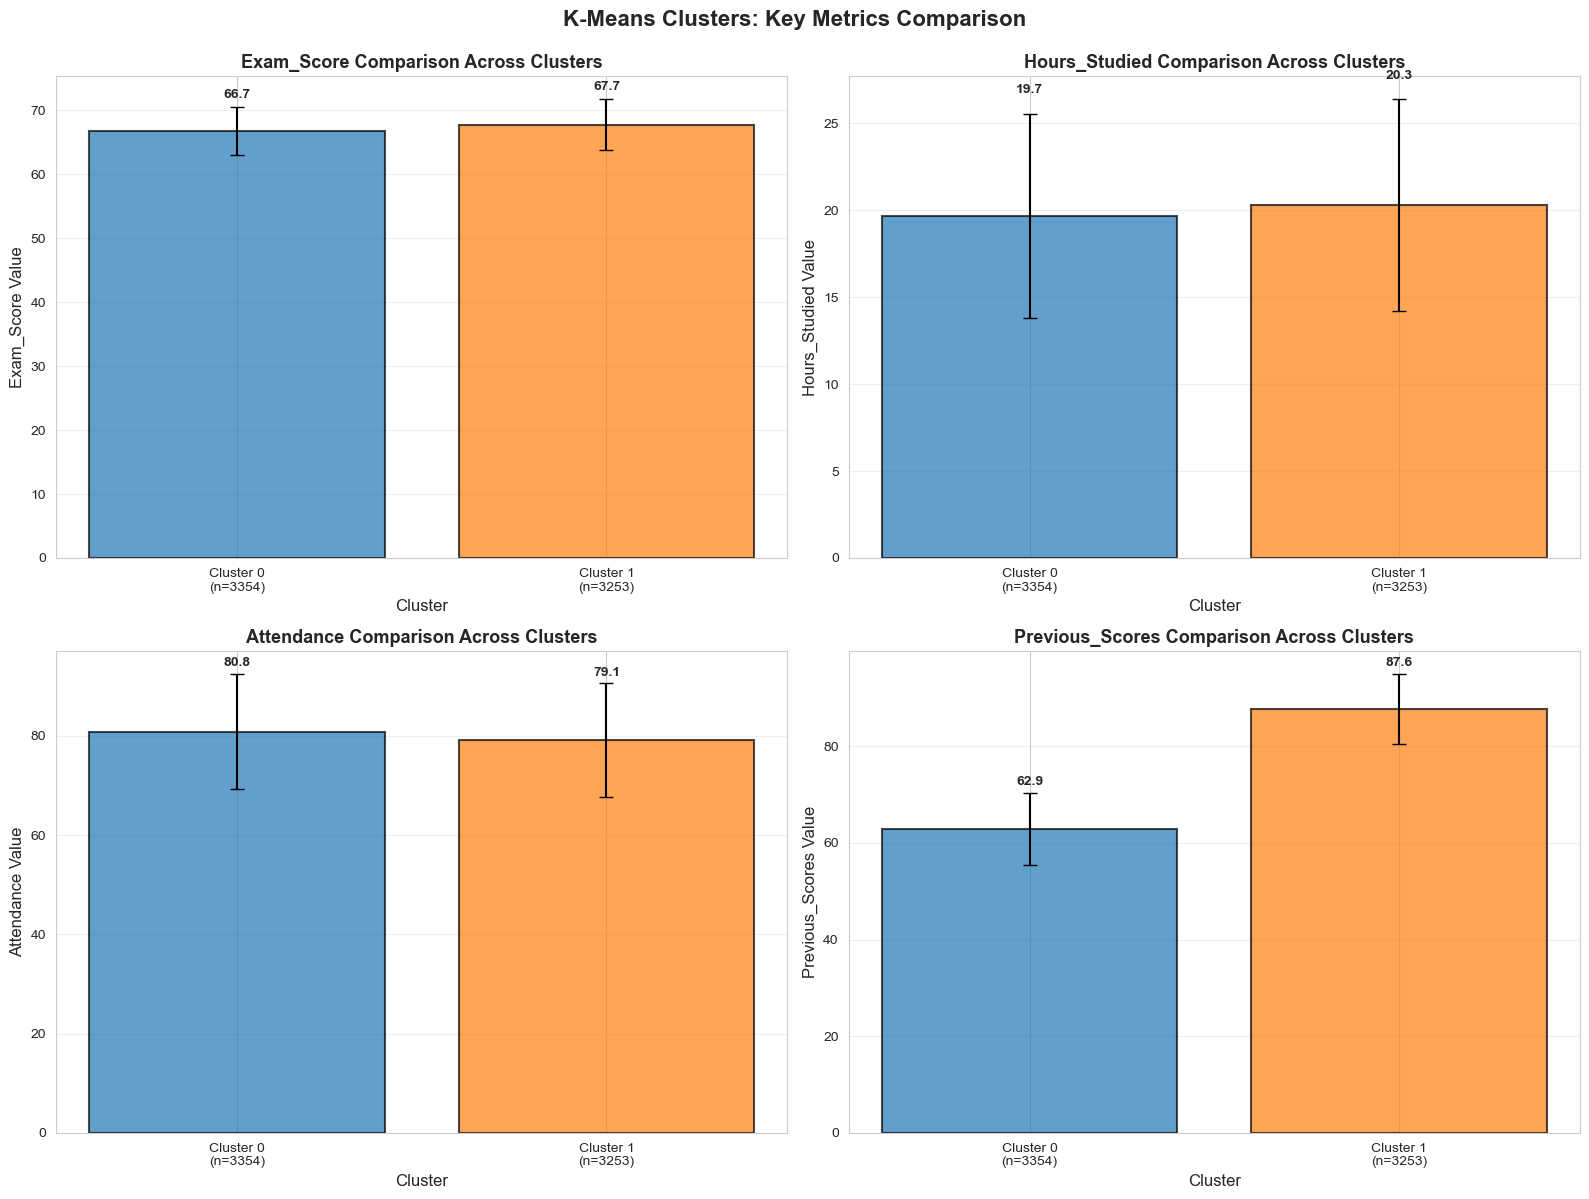

In [267]:
# 3. Side-by-Side Comparison of Key Metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Prepare data for comparison
comparison_features = ['Exam_Score', 'Hours_Studied', 'Attendance', 'Previous_Scores']
colors_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for idx, feature in enumerate(comparison_features):
    ax = axes[idx // 2, idx % 2]
    
    # Calculate means and std for each cluster
    cluster_stats = []
    cluster_labels = []
    for cluster_id in range(optimal_k):
        cluster_data = df[df['KMeans_Cluster'] == cluster_id][feature]
        cluster_stats.append({
            'mean': cluster_data.mean(),
            'std': cluster_data.std(),
            'min': cluster_data.min(),
            'max': cluster_data.max()
        })
        cluster_labels.append(f'Cluster {cluster_id}\n(n={len(cluster_data)})')
    
    # Create grouped bar chart
    x = np.arange(optimal_k)
    means = [stat['mean'] for stat in cluster_stats]
    stds = [stat['std'] for stat in cluster_stats]
    
    bars = ax.bar(x, means, yerr=stds, capsize=5, alpha=0.7, 
                  color=colors_list[:optimal_k], edgecolor='black', linewidth=1.5)
    ax.set_xlabel('Cluster', fontsize=12)
    ax.set_ylabel(f'{feature} Value', fontsize=12)
    ax.set_title(f'{feature} Comparison Across Clusters', fontsize=13, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(cluster_labels)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, (bar, mean_val) in enumerate(zip(bars, means)):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + stds[i] + 1,
               f'{mean_val:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('K-Means Clusters: Key Metrics Comparison', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


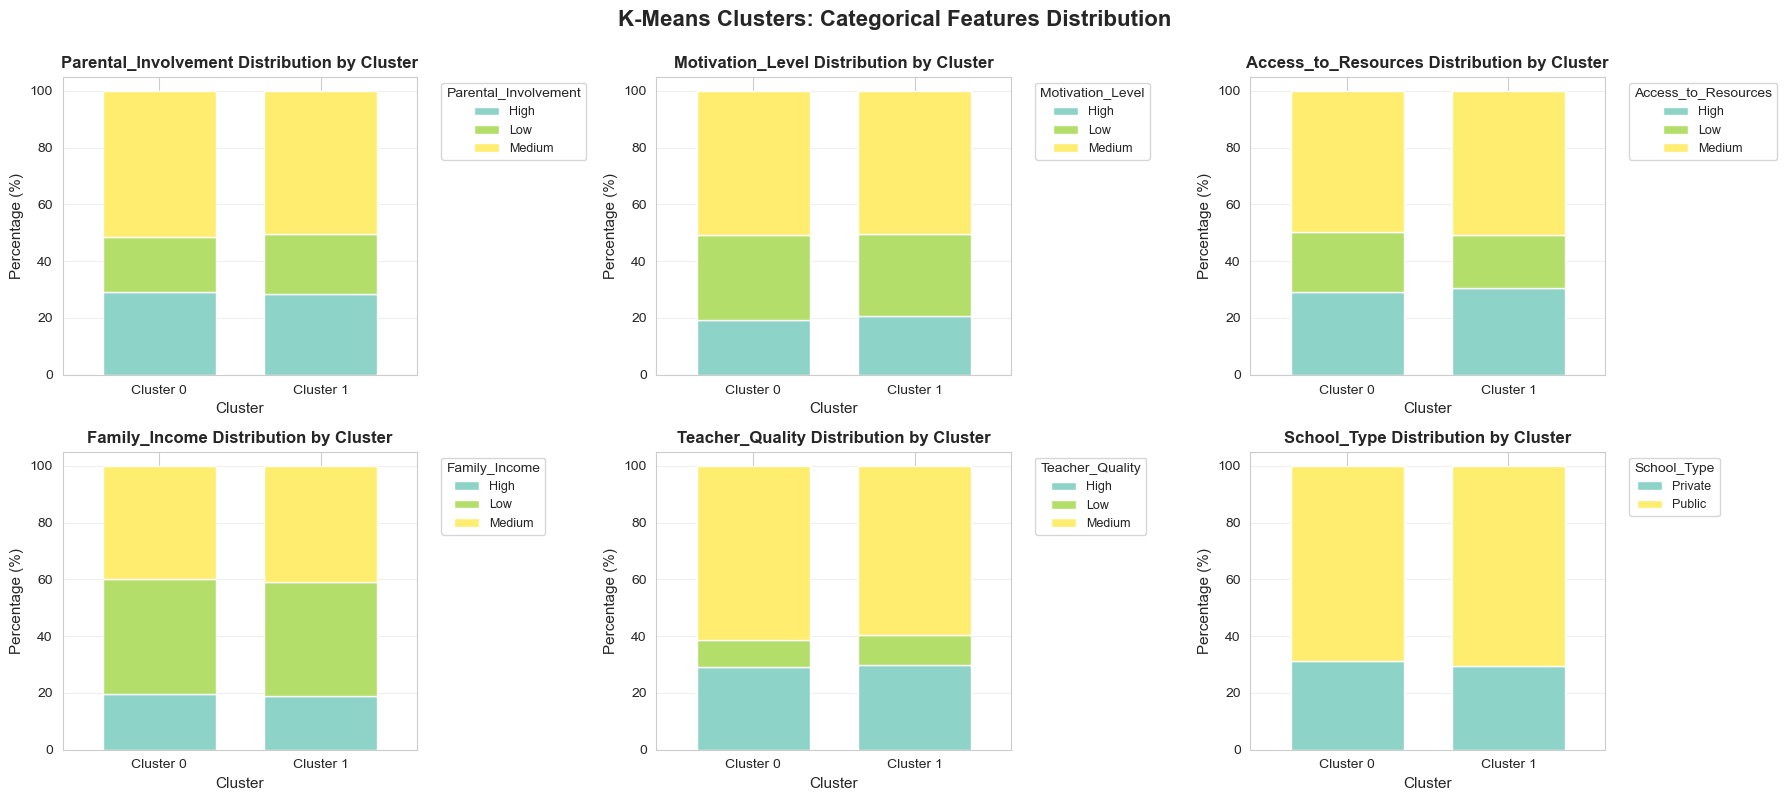

In [268]:
# 4. Categorical Features Distribution Across Clusters
categorical_features = ['Parental_Involvement', 'Motivation_Level', 'Access_to_Resources', 
                        'Family_Income', 'Teacher_Quality', 'School_Type']

# Create subplots for each categorical feature
n_features = len(categorical_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4*n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for idx, feature in enumerate(categorical_features):
    ax = axes[idx]
    
    # Create cross-tabulation
    crosstab = pd.crosstab(df['KMeans_Cluster'], df[feature], normalize='index') * 100
    
    # Create stacked bar chart
    crosstab.plot(kind='bar', stacked=True, ax=ax, colormap='Set3', width=0.7)
    ax.set_title(f'{feature} Distribution by Cluster', fontsize=12, fontweight='bold')
    ax.set_xlabel('Cluster', fontsize=11)
    ax.set_ylabel('Percentage (%)', fontsize=11)
    ax.set_xticklabels([f'Cluster {i}' for i in range(optimal_k)], rotation=0)
    ax.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
    ax.grid(True, alpha=0.3, axis='y')

# Hide unused subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('K-Means Clusters: Categorical Features Distribution', 
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


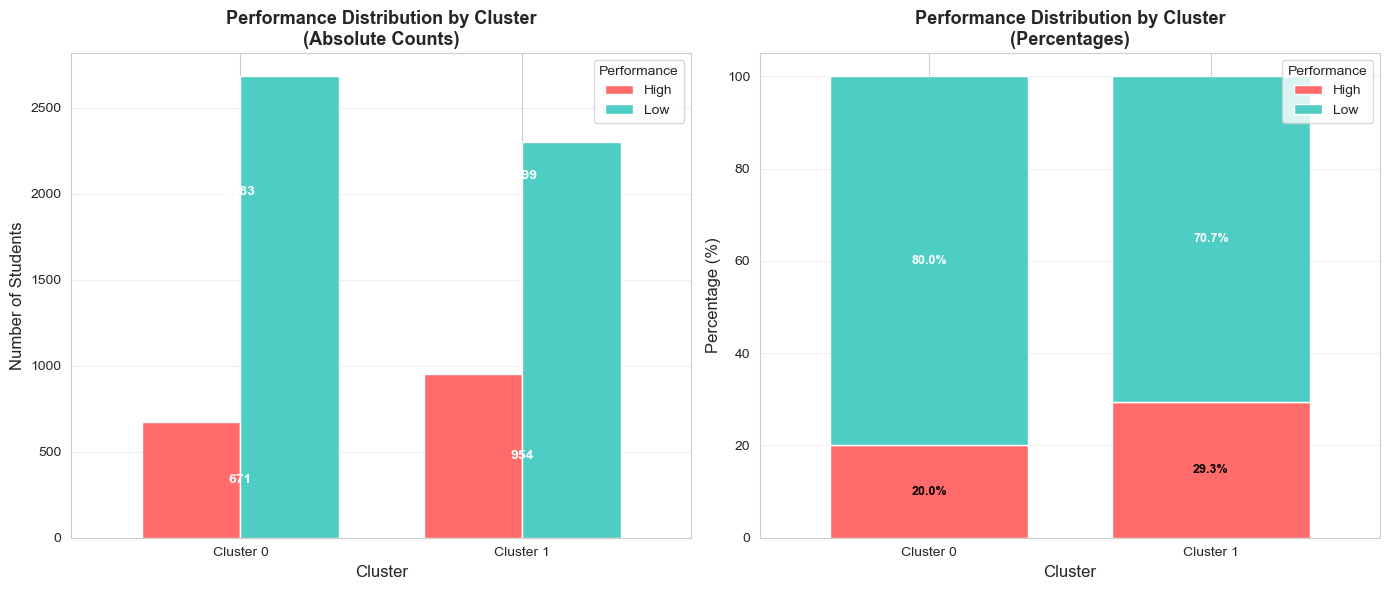

In [269]:
# 5. Performance Distribution by Cluster
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Stacked bar chart
performance_crosstab = pd.crosstab(df['KMeans_Cluster'], df['Performance'])
performance_crosstab_pct = pd.crosstab(df['KMeans_Cluster'], df['Performance'], normalize='index') * 100

# Absolute counts
performance_crosstab.plot(kind='bar', ax=axes[0], color=['#ff6b6b', '#4ecdc4'], width=0.7)
axes[0].set_title('Performance Distribution by Cluster\n(Absolute Counts)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Number of Students', fontsize=12)
axes[0].set_xticklabels([f'Cluster {i}' for i in range(optimal_k)], rotation=0)
axes[0].legend(title='Performance', fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels
for i in range(optimal_k):
    for j, perf in enumerate(['High', 'Low']):
        value = performance_crosstab.loc[i, perf]
        axes[0].text(i, value/2 if j == 0 else performance_crosstab.loc[i, 'High'] + value/2,
                    f'{value}', ha='center', va='center', fontsize=10, fontweight='bold',
                    color='white' if value > 100 else 'black')

# Percentage
performance_crosstab_pct.plot(kind='bar', stacked=True, ax=axes[1], 
                             color=['#ff6b6b', '#4ecdc4'], width=0.7)
axes[1].set_title('Performance Distribution by Cluster\n(Percentages)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Cluster', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].set_xticklabels([f'Cluster {i}' for i in range(optimal_k)], rotation=0)
axes[1].legend(title='Performance', fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

# Add percentage labels
for i in range(optimal_k):
    y_pos = 0
    for j, perf in enumerate(['High', 'Low']):
        pct = performance_crosstab_pct.loc[i, perf]
        if pct > 5:  # Only label if percentage is significant
            axes[1].text(i, y_pos + pct/2, f'{pct:.1f}%', 
                        ha='center', va='center', fontsize=9, fontweight='bold',
                        color='white' if pct > 30 else 'black')
        y_pos += pct

plt.tight_layout()
plt.show()


## Part 3: Association Rule Mining

In this section, we will:
1. Prepare data for association rule mining
2. Apply Apriori algorithm to find frequent itemsets
3. Generate association rules
4. Analyze and provide insights on discovered patterns


In [270]:
# Installing mlxtend (for association rule mining)
try:
    from mlxtend.frequent_patterns import apriori, association_rules
    from mlxtend.preprocessing import TransactionEncoder
except ImportError:
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "mlxtend"])
    from mlxtend.frequent_patterns import apriori, association_rules
    from mlxtend.preprocessing import TransactionEncoder

# Prepare data for association rule mining
# We'll create binary features from categorical variables and discretize numerical variables

# Select key categorical and numerical features for association rules
association_features = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
    'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
    'Extracurricular_Activities', 'Internet_Access', 'Learning_Disabilities',
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]

# Create binary transactions
# For categorical: create binary columns for each value
# For numerical: discretize into bins (High/Medium/Low)

df_assoc = df.copy()

# Discretize numerical features
def discretize_numerical(col, bins=3, labels=['Low', 'Medium', 'High']):
    return pd.cut(df_assoc[col], bins=bins, labels=labels, duplicates='drop')

# Discretize key numerical features
df_assoc['Hours_Studied_Cat'] = discretize_numerical('Hours_Studied')
df_assoc['Attendance_Cat'] = discretize_numerical('Attendance')
df_assoc['Previous_Scores_Cat'] = discretize_numerical('Previous_Scores')
df_assoc['Exam_Score_Cat'] = discretize_numerical('Exam_Score')
df_assoc['Sleep_Hours_Cat'] = discretize_numerical('Sleep_Hours')

# Prepare transaction data
transaction_data = []

for idx, row in df_assoc.iterrows():
    transaction = []
    
    # Add categorical features
    for col in association_features:
        if col in df_assoc.columns:
            transaction.append(f"{col}_{row[col]}")
    
    # Add discretized numerical features
    transaction.append(f"Hours_Studied_{row['Hours_Studied_Cat']}")
    transaction.append(f"Attendance_{row['Attendance_Cat']}")
    transaction.append(f"Previous_Scores_{row['Previous_Scores_Cat']}")
    transaction.append(f"Exam_Score_{row['Exam_Score_Cat']}")
    transaction.append(f"Sleep_Hours_{row['Sleep_Hours_Cat']}")
    
    transaction_data.append(transaction)

print(f"Total transactions: {len(transaction_data)}")
print(f"Sample transaction: {transaction_data[0][:10]}...")


Total transactions: 6607
Sample transaction: ['Parental_Involvement_Low', 'Access_to_Resources_High', 'Motivation_Level_Low', 'Family_Income_Low', 'Teacher_Quality_Medium', 'School_Type_Public', 'Peer_Influence_Positive', 'Extracurricular_Activities_No', 'Internet_Access_Yes', 'Learning_Disabilities_No']...


In [271]:
# Converting transactions to binary matrix
te = TransactionEncoder()
te_ary = te.fit(transaction_data).transform(transaction_data)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Transaction matrix shape: {df_transactions.shape}")
print(f"Number of unique items: {len(te.columns_)}")
print(f"\nFirst few items: {list(te.columns_[:10])}")


Transaction matrix shape: (6607, 49)
Number of unique items: 49

First few items: ['Access_to_Resources_High', 'Access_to_Resources_Low', 'Access_to_Resources_Medium', 'Attendance_High', 'Attendance_Low', 'Attendance_Medium', 'Distance_from_Home_Far', 'Distance_from_Home_Moderate', 'Distance_from_Home_Near', 'Exam_Score_High']


In [272]:
# Apply Apriori algorithm to find frequent itemsets
# Try different minimum support values
min_support_values = [0.1, 0.15, 0.2, 0.25]

print("Finding frequent itemsets with Apriori algorithm...")
print("-"*60)

frequent_itemsets_list = {}

for min_sup in min_support_values:
    frequent_itemsets = apriori(df_transactions, min_support=min_sup, use_colnames=True, max_len=3)
    frequent_itemsets_list[min_sup] = frequent_itemsets
    print(f"\nMin Support = {min_sup}:")
    print(f"  Number of frequent itemsets: {len(frequent_itemsets)}")
    if len(frequent_itemsets) > 0:
        print(f"  Top 5 itemsets by support:")
        print(frequent_itemsets.nlargest(5, 'support')[['support', 'itemsets']].to_string())

# Use the best min_support (one that gives reasonable number of itemsets)
best_min_support = 0.15
frequent_itemsets = frequent_itemsets_list[best_min_support]

print(f"\nUsing min_support = {best_min_support}")
print(f"Total frequent itemsets found: {len(frequent_itemsets)}")


Finding frequent itemsets with Apriori algorithm...
------------------------------------------------------------

Min Support = 0.1:
  Number of frequent itemsets: 2861
  Top 5 itemsets by support:
      support                                         itemsets
19   0.924474                            (Internet_Access_Yes)
20   0.894809                       (Learning_Disabilities_No)
8    0.836083                                 (Exam_Score_Low)
464  0.826699  (Learning_Disabilities_No, Internet_Access_Yes)
253  0.768276            (Internet_Access_Yes, Exam_Score_Low)

Min Support = 0.15:
  Number of frequent itemsets: 1377
  Top 5 itemsets by support:
      support                                         itemsets
19   0.924474                            (Internet_Access_Yes)
20   0.894809                       (Learning_Disabilities_No)
8    0.836083                                 (Exam_Score_Low)
315  0.826699  (Learning_Disabilities_No, Internet_Access_Yes)
171  0.768276          

In [273]:
# Generate association rules
print("\nGenerating association rules...")
print("-"*60)

# Generate rules with different metrics
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print(f"Total rules generated: {len(rules)}")

if len(rules) > 0:
    # Sort by confidence and lift
    rules_sorted = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
    
    print(f"\nTop 10 Rules by Confidence:")
    print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10).to_string())
    
    # Filter high-quality rules (high confidence and lift > 1)
    high_quality_rules = rules[(rules['confidence'] >= 0.6) & (rules['lift'] > 1.0)]
    print(f"\nHigh-quality rules (confidence >= 0.6, lift > 1.0): {len(high_quality_rules)}")
    
    if len(high_quality_rules) > 0:
        print(f"\nTop High-Quality Rules:")
        print(high_quality_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10).to_string())
else:
    print("No rules found with the current thresholds. Trying lower confidence threshold...")
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
    print(f"Rules with confidence >= 0.3: {len(rules)}")
    if len(rules) > 0:
        rules_sorted = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
        print(f"\nTop 10 Rules:")
        print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10).to_string())



Generating association rules...
------------------------------------------------------------
Total rules generated: 3112

Top 10 Rules by Confidence:
                                                antecedents       consequents   support  confidence      lift
788                  (Hours_Studied_Medium, Attendance_Low)  (Exam_Score_Low)  0.238232    0.988073  1.181788
472            (Access_to_Resources_Medium, Attendance_Low)  (Exam_Score_Low)  0.170577    0.987730  1.181378
799  (Parental_Education_Level_High School, Attendance_Low)  (Exam_Score_Low)  0.172696    0.985320  1.178495
802           (Parental_Involvement_Medium, Attendance_Low)  (Exam_Score_Low)  0.170879    0.984307  1.177284
794              (Learning_Disabilities_No, Attendance_Low)  (Exam_Score_Low)  0.295142    0.983359  1.176150
797               (Motivation_Level_Medium, Attendance_Low)  (Exam_Score_Low)  0.167096    0.983081  1.175818
785                           (Gender_Male, Attendance_Low)  (Exam_Score_Low)  

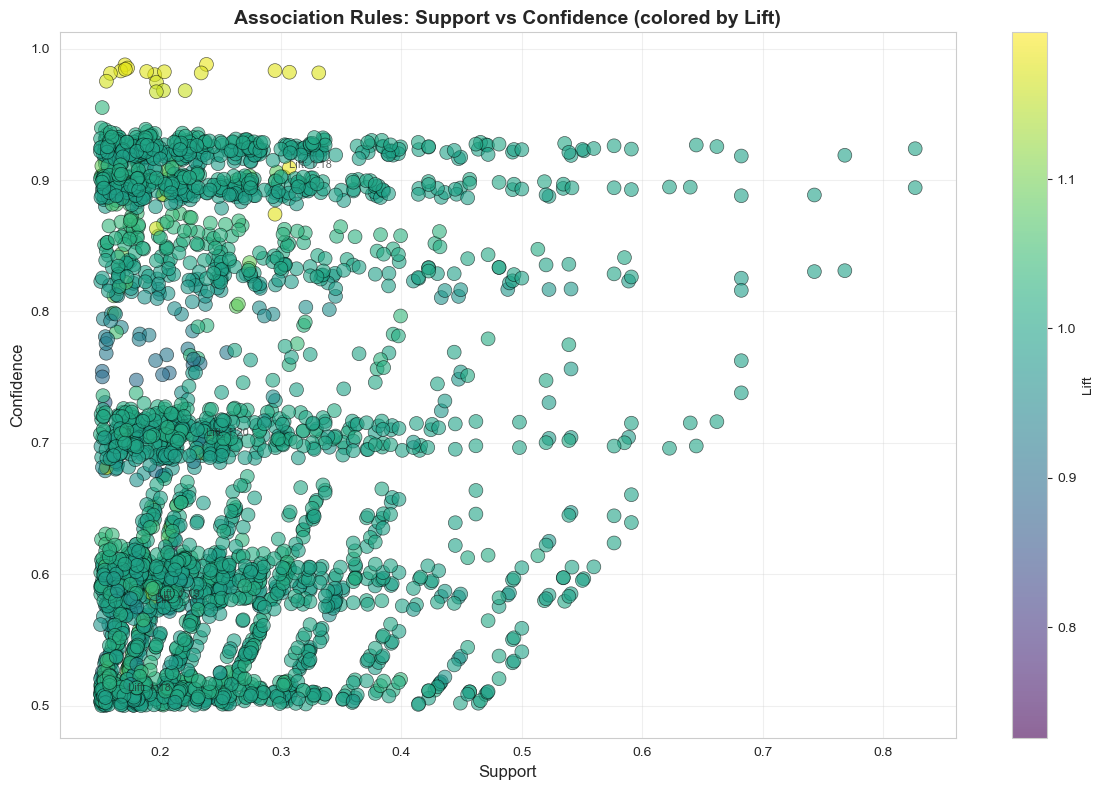

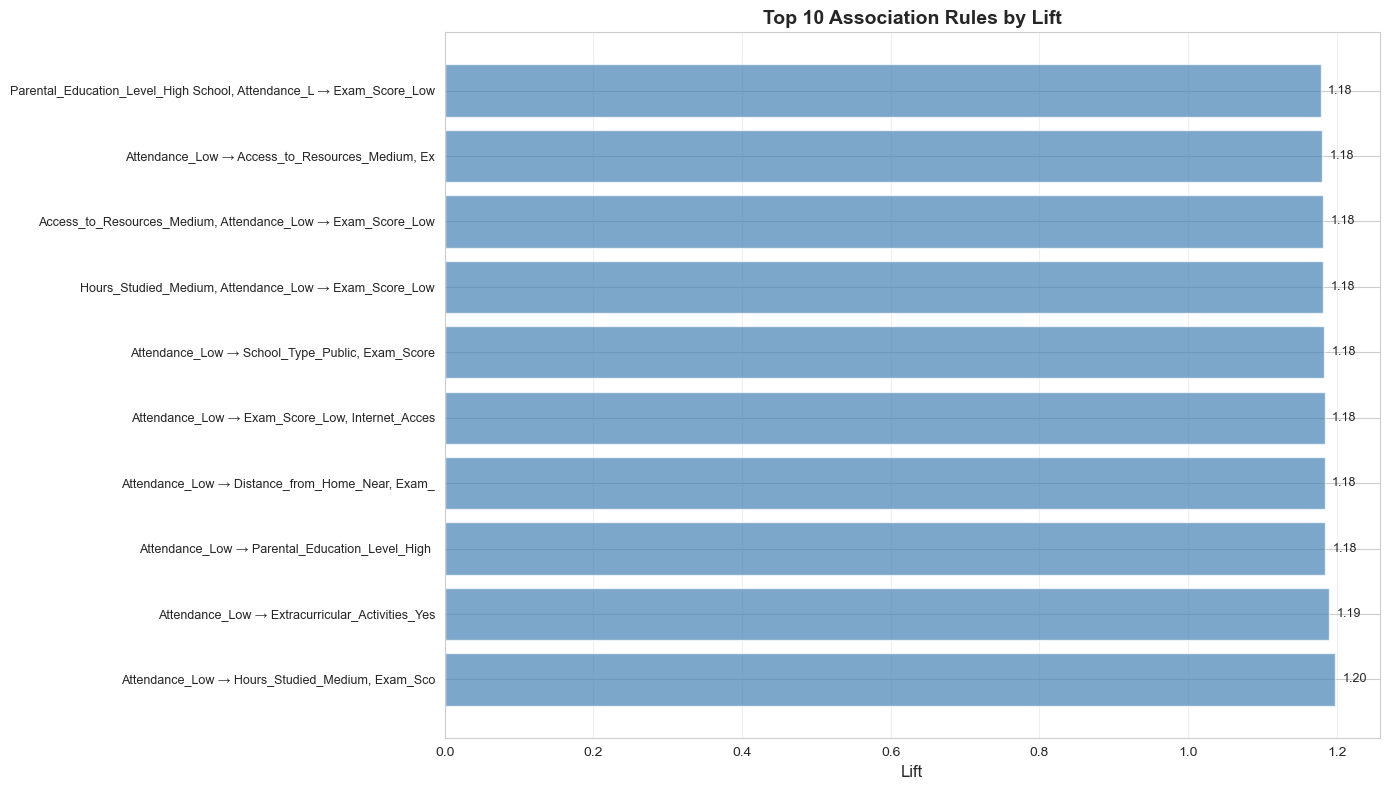

In [274]:
# Visualizing association rules
if len(rules) > 0:
    # Scatter plot: Support vs Confidence
    plt.figure(figsize=(12, 8))
    
    scatter = plt.scatter(rules['support'], rules['confidence'], 
                         c=rules['lift'], cmap='viridis', 
                         s=100, alpha=0.6, edgecolors='black', linewidth=0.5)
    plt.colorbar(scatter, label='Lift')
    plt.xlabel('Support', fontsize=12)
    plt.ylabel('Confidence', fontsize=12)
    plt.title('Association Rules: Support vs Confidence (colored by Lift)', 
             fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # Annotate top rules
    if len(rules) > 0:
        top_rules = rules.nlargest(5, 'lift')
        for idx, rule in top_rules.iterrows():
            plt.annotate(f"Lift: {rule['lift']:.2f}", 
                        (rule['support'], rule['confidence']),
                        fontsize=8, alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Bar plot of top rules by lift
    if len(rules) > 0:
        top_rules = rules.nlargest(10, 'lift')
        fig, ax = plt.subplots(figsize=(14, 8))
        
        # Create rule labels
        rule_labels = []
        for idx, rule in top_rules.iterrows():
            antecedents = ', '.join(list(rule['antecedents']))[:50]
            consequents = ', '.join(list(rule['consequents']))[:30]
            rule_labels.append(f"{antecedents} → {consequents}")
        
        y_pos = np.arange(len(rule_labels))
        bars = ax.barh(y_pos, top_rules['lift'], color='steelblue', alpha=0.7)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(rule_labels, fontsize=9)
        ax.set_xlabel('Lift', fontsize=12)
        ax.set_title('Top 10 Association Rules by Lift', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='x')
        
        # Add value labels on bars
        for i, (bar, lift) in enumerate(zip(bars, top_rules['lift'])):
            ax.text(lift + 0.01, bar.get_y() + bar.get_height()/2, 
                   f'{lift:.2f}', va='center', fontsize=9)
        
        plt.tight_layout()
        plt.show()


### Insights from above data
The association rule analysis highlights key patterns linking student attributes to exam performance. The most consistent finding is that low attendance strongly predicts low exam scores, often in combination with medium study hours, parental involvement, or teacher quality, with confidence values above 0.98. Other high-quality rules indicate that access to resources influences learning outcomes, where low access is associated with low scores and high access with no learning disabilities. Additionally, factors such as study hours, school type, teacher quality, and proximity to school appear in several rules, suggesting they moderately affect performance. Overall, these rules reveal that attendance and access to resources are the strongest drivers of exam outcomes, while other factors like motivation, parental involvement, and school-related conditions also contribute but to a lesser extent.

## Provide insights into how these discovered patterns can be applied in a real-world context.


### Classification Insights: Predictive Intervention

The analysis revealed that the Tuned Naïve Bayes model achieved the highest performance among classification models, with an accuracy of 0.9281 and an F1 score of 0.9536. This makes it a robust tool for predicting whether a student is likely to achieve a high or low exam score. By applying this model to historical or current student data, such as previous scores, attendance, and demographics, educational institutions can identify students at high risk of low performance long before exams occur. This predictive capability enables targeted interventions, allowing schools to prioritize resources such as remedial classes, counseling, tutoring, or parent engagement. By shifting from reactive to proactive support, institutions can maximize the effectiveness of their academic assistance programs.

### Clustering Insights: Differentiated Support Groups

K-Means clustering revealed two distinct student groups primarily differentiated by previous scores and family income, indicating a strong link between socioeconomic factors and academic performance.

Cluster 0 (Lower Previous Scores, Low Family Income): This group contains the lowest percentage of high performers (20%). Interventions for these students could focus on addressing foundational skill gaps and providing additional material or financial resources.

Cluster 1 (Higher Previous Scores, Medium Family Income): While performing better overall, 70.7% of students in this cluster still score low. Interventions here may target advanced subject enrichment, motivation, or strategies to maintain academic momentum.

These clusters provide a clear, data-driven basis for resource allocation, enabling the school to distribute scholarships, tutoring slots, or counseling time where it is needed most, ensuring equitable support.

### Association Rule Insights: Causal Factors and Policy
Association rule mining highlighted strong conditional relationships between various factors and student performance outcomes.

Risk Mitigation: High-confidence rules, such as Attendance_Low ⇒ Exam_Score_Low (98.16% confidence, 1.17 lift), indicate nearly certain predictors of poor performance. This underscores the importance of attendance as a non-negotiable factor in academic success. Schools should implement or strengthen policies to monitor attendance closely, such as mandatory check-ins or automated alerts for parents and counselors.

Resource Management: Rules like Access_to_Resources_Low ⇒ Exam_Score_Low (91.16% confidence) and Access_to_Resources_Medium ⇒ Exam_Score_Low (85.18% confidence) reveal that inadequate access to resources is a major barrier. The institution should audit and enhance resource accessibility, including library hours, computer labs, and textbook loan programs, particularly for students with reported low access. Interestingly, the rule Access_to_Resources_Low ⇒ Internet_Access_Yes (93.22% confidence) suggests that “low resources” may not mean a lack of internet but a deficiency in other critical tools, allowing the school to refine its understanding of resource gaps.